In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [318]:
state_zhvi= pd.read_csv('State_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
state_zhvi.head()

RegionID  SizeRank    RegionName RegionType  StateName     2000-01-31  \
0         9         0    California      state        NaN  181445.288085   
1        54         1         Texas      state        NaN  103786.301517   
2        14         2       Florida      state        NaN  101925.593703   
3        43         3      New York      state        NaN  124854.002092   
4        47         4  Pennsylvania      state        NaN   88604.552671   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...  \
0  182056.654538  182880.980363  184669.632027  186747.053661  ...   
1  103841.423160  103867.417961  104000.569938  104086.159679  ...   
2  102146.709317  102414.401206  102958.288775  103544.419614  ...   
3  125299.287369  125727.419292  126647.733214  127598.133634  ...   
4   88794.196231   88972.391047   89335.455124   89708.381679  ...   

      2022-04-30     2022-05-31     2022-06-30     2022-07-31     2022-08-31  \
0  734911.511392  745281.527788  750924.785772  751311.806472  746802.763539   
1  282803.348080  288005.110656  292564.322231  295315.750770  296153.946809   
2  357524.382273  366227.328931  373786.272269  378949.510899  381536.649338   
3  403587.515278  408505.064228  413176.395966  416399.510820  417527.323619   
4  233374.464741  236410.670967  238787.970731  239760.960107  239688.211876   

      2022-09-30     2022-10-31     2022-11-30     2022-12-31     2023-01-31  
0  739548.911109  733118.959725  728127.391155  723104.776230  716909.241412  
1  295467.478115  294536.418916  293583.848173  292102.108348  290862.837255  
2  381819.637897  381354.778795  380715.159796  379325.772709  377816.034794  
3  416383.303044  414949.309906  413769.501046  411895.345960  411206.072112  
4  238902.042579  238759.384806  239087.341246  239378.988366  239958.048316  

[5 rows x 282 columns]

In [319]:
#shape of the data
state_zhvi.shape

(51, 282)

In [320]:
#columns
state_zhvi.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31'],
      dtype='object', length=282)

In [321]:
# droping statename and regionid regiontype and size rank
state_zhvi.drop(['StateName','RegionID','RegionType','SizeRank'],axis=1,inplace=True)

In [322]:
#counting null values row wise
state_zhvi.isnull().sum(axis=1)
#droping rows with null values
state_zhvi.dropna(inplace=True)
state_zhvi.shape

(40, 278)

In [323]:
# /setting index as regionname
state_zhvi.set_index('RegionName',inplace=True)

In [324]:
# import us states and abrevation file 
usa_states = pd.read_csv('usa_states.csv', index_col=["State Name"])

#drop traditional abreavation column
usa_states.drop(['Traditional Abbreviation'],axis=1,inplace=True)

In [325]:
usa_states.head()

USPS Abbreviation
State Name                  
Alabama                   AL
Alaska                    AK
Arizona                   AZ
Arkansas                  AR
California                CA

In [326]:
# add StateName column to state_zhvi and map state Name to state abrevation
state_zhvi['StateName'] = state_zhvi.index.map(usa_states['USPS Abbreviation'])


In [327]:
# seeking for null in state name
state_zhvi['StateName'].isnull().sum()

1

In [328]:
# replace null value in district of columbia with DC
state_zhvi['StateName'].fillna('DC',inplace=True)
# setting state name as index  
state_zhvi.set_index('StateName',inplace=True)


In [329]:
state_zhvi.head()

2000-01-31     2000-02-29     2000-03-31     2000-04-30  \
StateName                                                               
CA         181445.288085  182056.654538  182880.980363  184669.632027   
TX         103786.301517  103841.423160  103867.417961  104000.569938   
FL         101925.593703  102146.709317  102414.401206  102958.288775   
NY         124854.002092  125299.287369  125727.419292  126647.733214   
PA          88604.552671   88794.196231   88972.391047   89335.455124   

              2000-05-31     2000-06-30     2000-07-31     2000-08-31  \
StateName                                                               
CA         186747.053661  188987.965067  191354.809261  193827.143452   
TX         104086.159679  104183.083670  104247.061136  104438.923189   
FL         103544.419614  104142.476696  104743.620734  105355.945016   
NY         127598.133634  128625.525583  129549.149849  130357.980954   
PA          89708.381679   90091.577701   90498.474414   90886.782610   

              2000-09-30     2000-10-31  ...     2022-04-30     2022-05-31  \
StateName                                ...                                 
CA         196306.435939  198657.129551  ...  734911.511392  745281.527788   
TX         104691.515787  104963.161482  ...  282803.348080  288005.110656   
FL         105990.525873  106638.296230  ...  357524.382273  366227.328931   
NY         131075.909142  131846.811057  ...  403587.515278  408505.064228   
PA          91282.390679   91661.794926  ...  233374.464741  236410.670967   

              2022-06-30     2022-07-31     2022-08-31     2022-09-30  \
StateName                                                               
CA         750924.785772  751311.806472  746802.763539  739548.911109   
TX         292564.322231  295315.750770  296153.946809  295467.478115   
FL         373786.272269  378949.510899  381536.649338  381819.637897   
NY         413176.395966  416399.510820  417527.323619  416383.303044   
PA         238787.970731  239760.960107  239688.211876  238902.042579   

              2022-10-31     2022-11-30     2022-12-31     2023-01-31  
StateName                                                              
CA         733118.959725  728127.391155  723104.776230  716909.241412  
TX         294536.418916  293583.848173  292102.108348  290862.837255  
FL         381354.778795  380715.159796  379325.772709  377816.034794  
NY         414949.309906  413769.501046  411895.345960  411206.072112  
PA         238759.384806  239087.341246  239378.988366  239958.048316  

[5 rows x 277 columns]

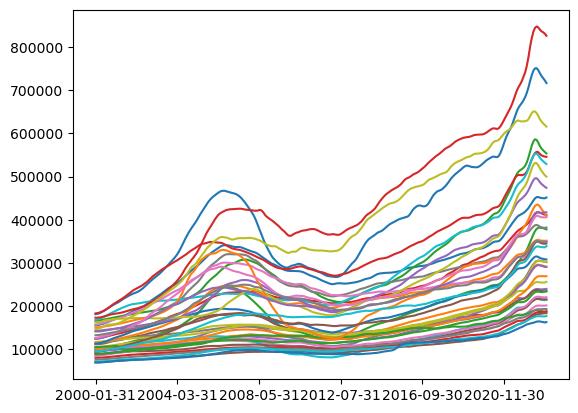

In [190]:
# plot rowwise data as timeseries all rows on one plot
# axis y is the price
# axis x is the time
# plot the first row
for i in range(0,metro_zhvi.shape[0]):
    
    state_zhvi.iloc[i].plot()
   

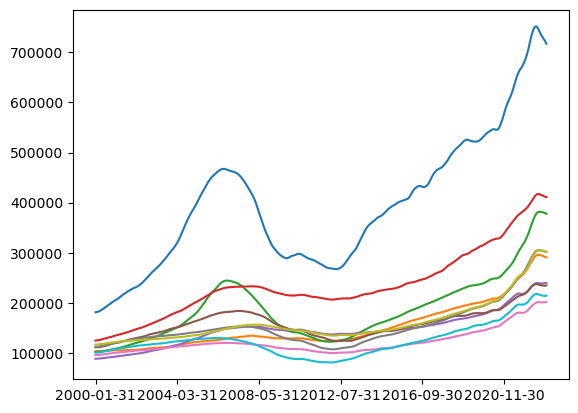

In [191]:
#plot the first 10 rows
for i in range(0,10):
    
    state_zhvi.iloc[i].plot()       

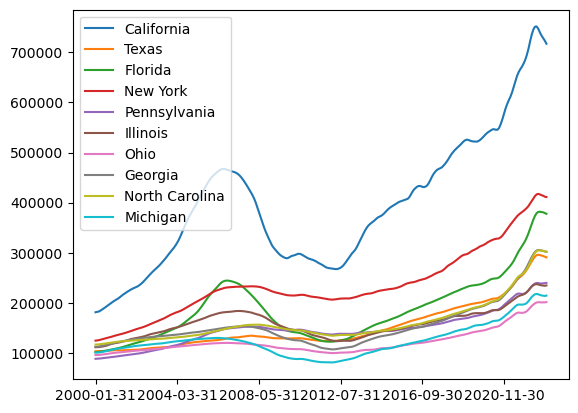

In [192]:
# plot the first 10 rows with legend    
for i in range(0,10):
        
        state_zhvi.iloc[i].plot(label=metro_zhvi.index[i], legend=True)


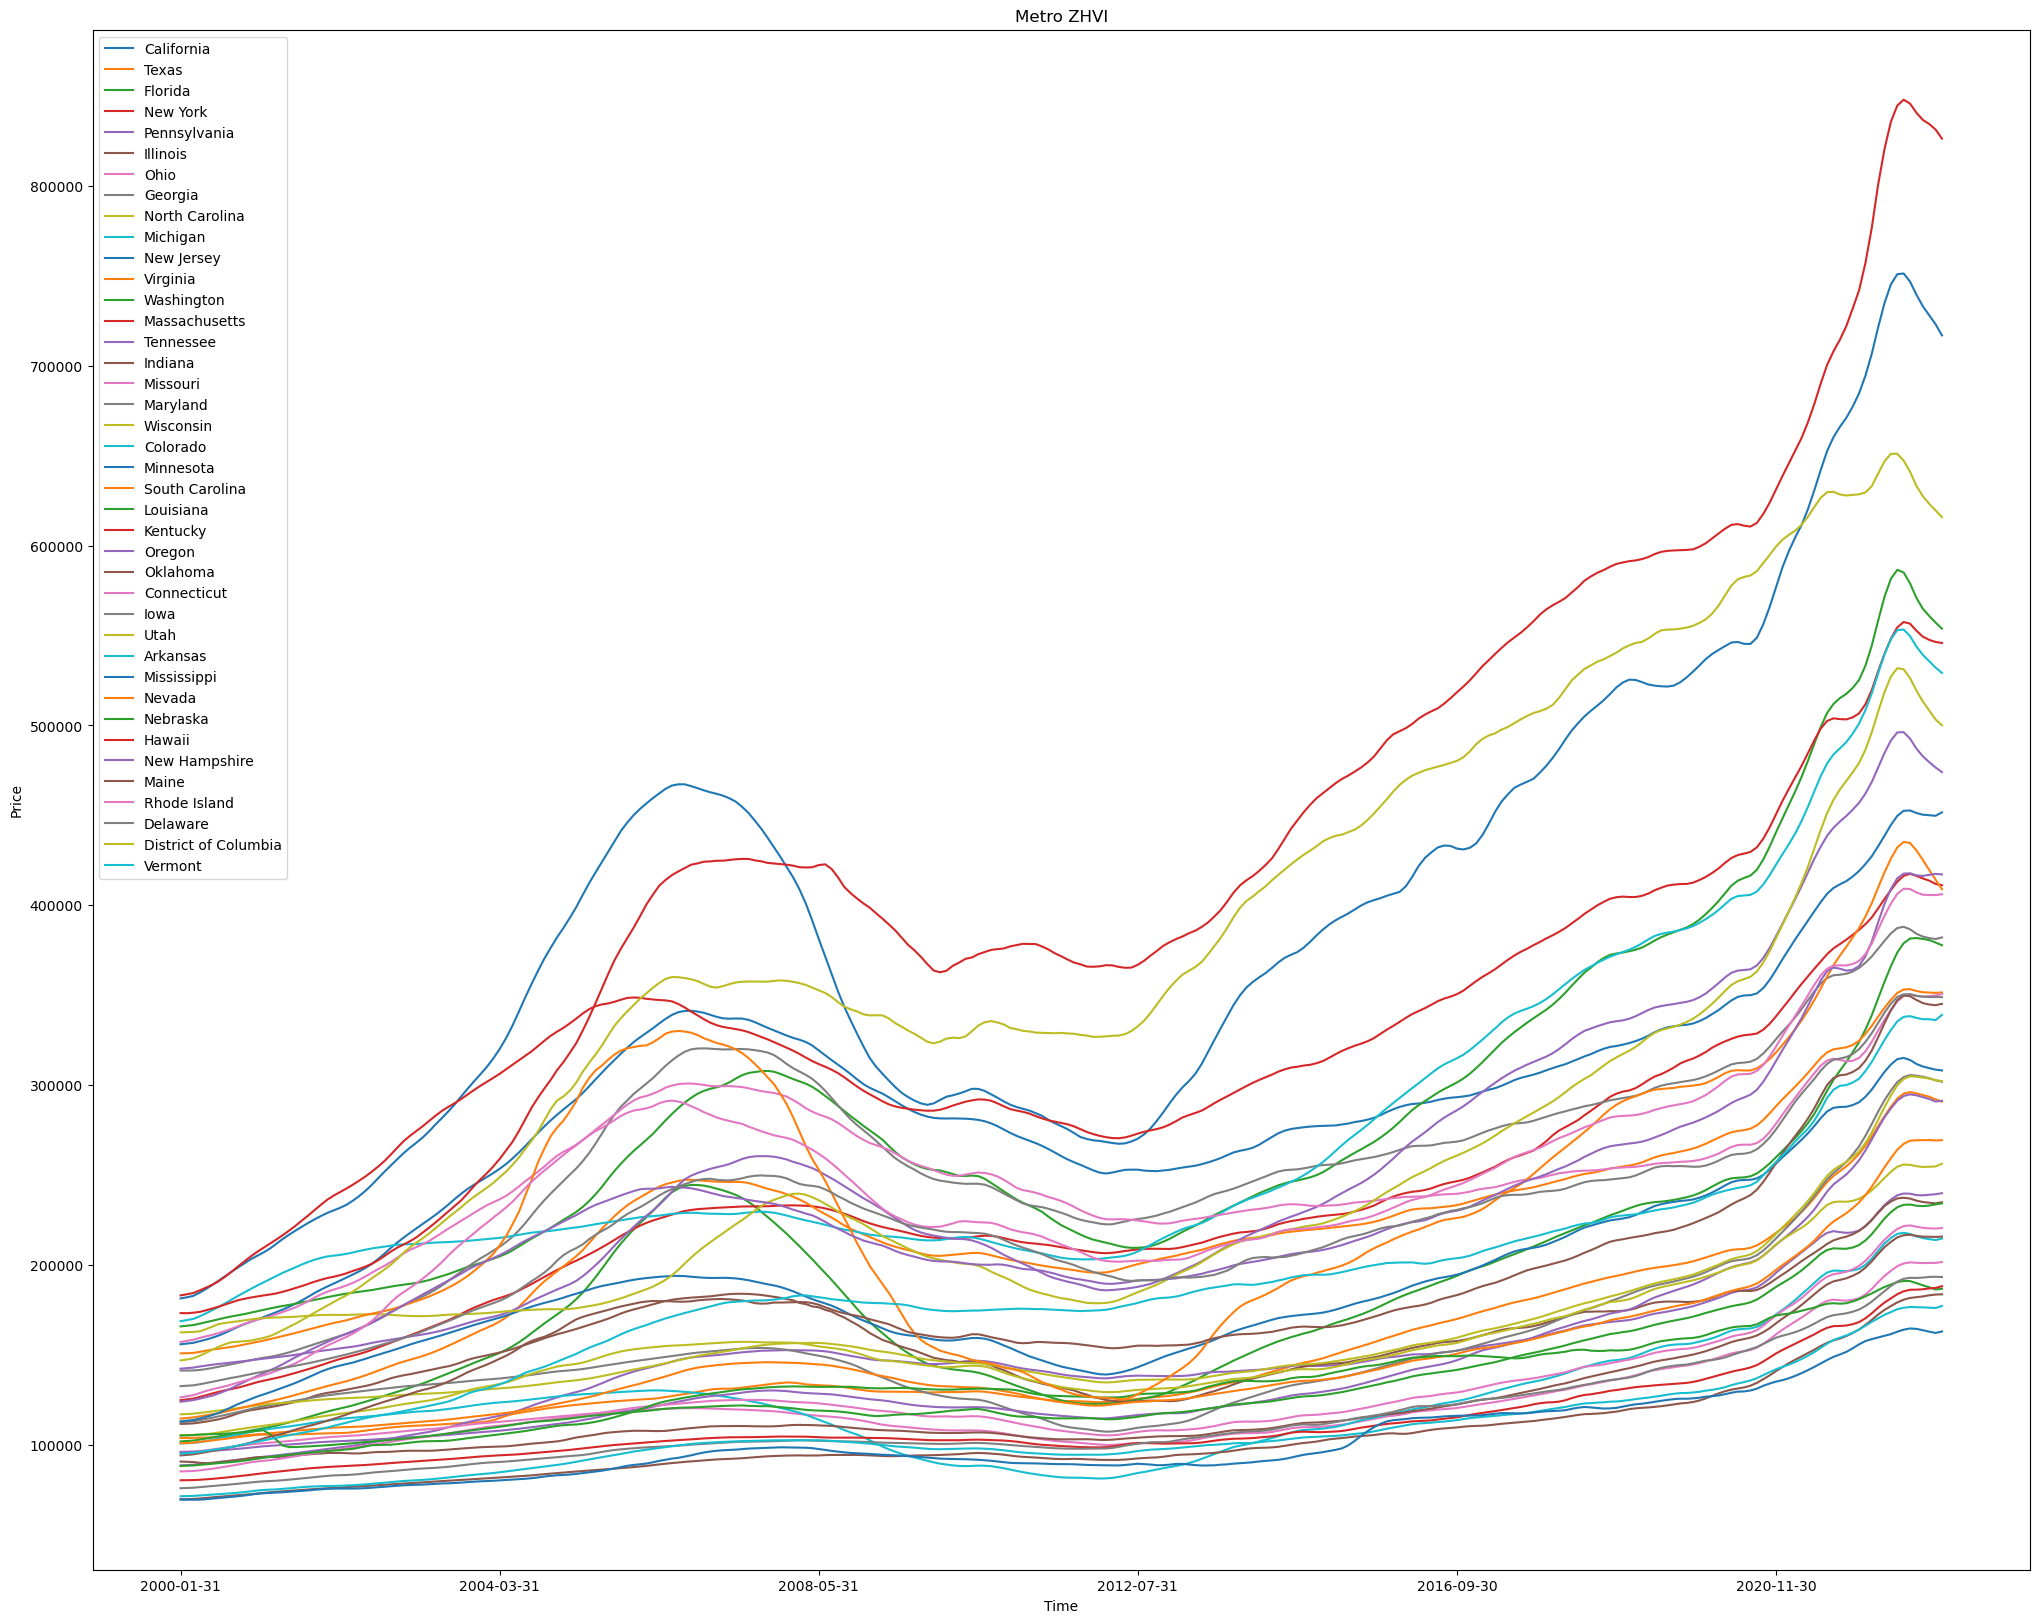

In [25]:
# plot all state seprately with legend
for i in range(0,state_zhvi.shape[0]):
            
            state_zhvi.iloc[i].plot(label=metro_zhvi.index[i], legend=True, figsize=(25,20))
            plt.title('Metro ZHVI')
            plt.ylabel('Price')
            plt.xlabel('Time')


Working with ZHVF data

In [210]:
# importing the data for metro_zhvf
metro_zhvf= pd.read_csv("Metro_zhvf_growth_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
metro_zhvf.head()

RegionID  SizeRank       RegionName RegionType StateName    BaseDate  \
0    102001         0    United States    country       NaN  2023-01-31   
1    394913         1     New York, NY        msa        NY  2023-01-31   
2    753899         2  Los Angeles, CA        msa        CA  2023-01-31   
3    394463         3      Chicago, IL        msa        IL  2023-01-31   
4    394514         4       Dallas, TX        msa        TX  2023-01-31   

   2023-02-28  2023-04-30  2024-01-31  
0        -0.1         0.0         0.5  
1         0.0         0.2        -1.3  
2        -1.3        -3.5        -3.3  
3         0.3         0.3        -1.8  
4        -0.4        -0.5        -0.4

In [149]:
#shape of the data
metro_zhvf.shape

(896, 9)

In [150]:
metro_zhvf["BaseDate"].unique()

array(['2023-01-31'], dtype=object)

In [151]:
#dropping region id , size rank, region type, 
metro_zhvf.drop(['RegionID','SizeRank','RegionType','BaseDate'],axis=1,inplace=True)

In [330]:
metro_zhvf.iloc[0, 2: ]

RegionName    United States
RegionType          country
StateName               NaN
BaseDate         2023-01-31
2023-02-28             -0.1
2023-04-30              0.0
2024-01-31              0.5
Name: 0, dtype: object

<AxesSubplot: >

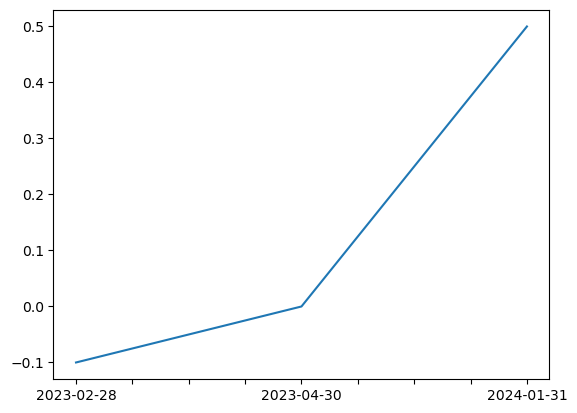

In [152]:
# ploting row one as its represent usa
metro_zhvf.iloc[0, 2: ].plot()

In [42]:
#checking for null values
metro_zhvf.isnull().sum()

RegionName     0
StateName      1
2023-02-28    12
2023-04-30     0
2024-01-31     0
dtype: int64

In [33]:
#grouping by statename
state_zhvf=metro_zhvf.groupby('StateName').mean()

In [34]:
state_zhvf.head()

2023-02-28  2023-04-30  2024-01-31
StateName                                    
AK          -0.275000   -1.025000   -4.075000
AL           0.843750    1.245000    1.120000
AR           1.073684    1.930000    0.895000
AZ          -0.250000   -0.260000    1.770000
CA          -0.582353   -1.158824   -2.058824

In [43]:
state_zhvf.shape

(50, 3)

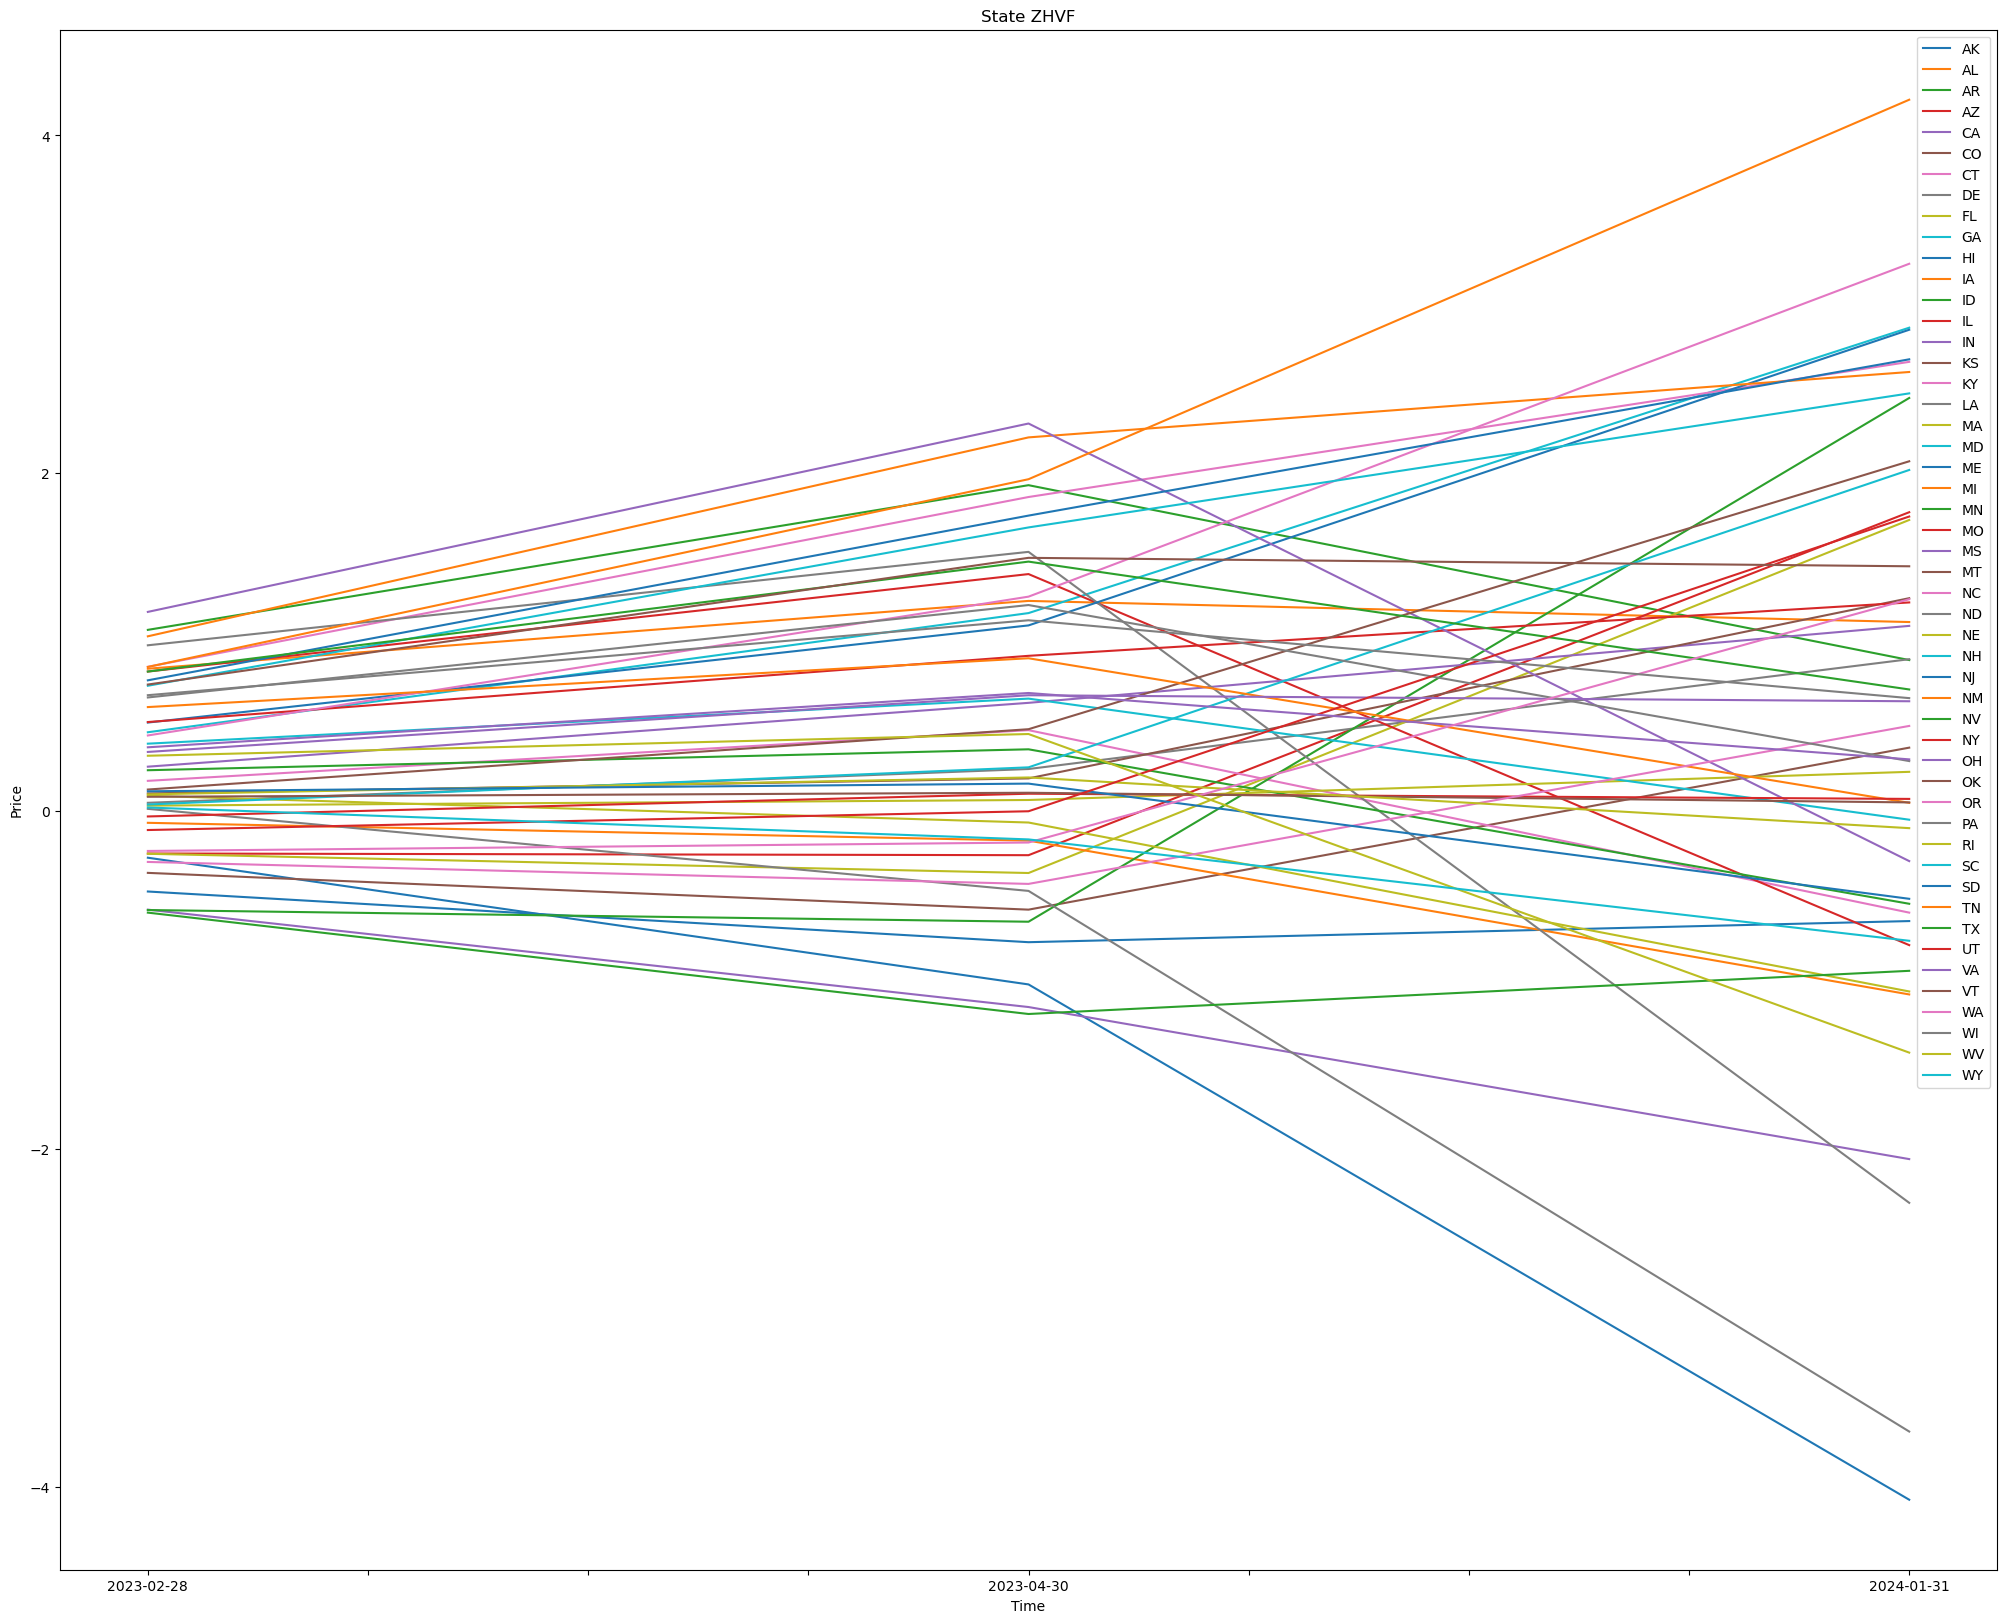

In [44]:
# plot data rowsize wise for each state
for i in range(0,state_zhvf.shape[0]):
            
            state_zhvf.iloc[i].plot(label=state_zhvf.index[i], legend=True, figsize=(25,20))
            plt.title('State ZHVF')
            plt.ylabel('Price')
            plt.xlabel('Time')


<!-- Working with inventory -->

In [153]:
# importing the data for metro_inventory
inventory= pd.read_csv("Metro_invt_fs_uc_sfrcondo_sm_month.csv")
inventory.head()

RegionID  SizeRank       RegionName RegionType StateName  2018-03-31  \
0    102001         0    United States    country       NaN   1421529.0   
1    394913         1     New York, NY        msa        NY     73707.0   
2    753899         2  Los Angeles, CA        msa        CA     21998.0   
3    394463         3      Chicago, IL        msa        IL     38581.0   
4    394514         4       Dallas, TX        msa        TX     24043.0   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2022-04-30  \
0   1500193.0   1592413.0   1660612.0   1709141.0  ...    758418.0   
1     80345.0     85864.0     90067.0     91881.0  ...     47109.0   
2     23784.0     25605.0     27109.0     28811.0  ...     15425.0   
3     42253.0     45757.0     47492.0     48984.0  ...     23993.0   
4     25876.0     28225.0     30490.0     32408.0  ...     14963.0   

   2022-05-31  2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  \
0    842516.0    927701.0   1012953.0   1071039.0   1080747.0   1065488.0   
1     51197.0     54292.0     56794.0     57028.0     56203.0     54573.0   
2     16951.0     18425.0     20182.0     21357.0     21499.0     20945.0   
3     26443.0     28448.0     30255.0     31135.0     30782.0     29809.0   
4     16053.0     17750.0     20382.0     22258.0     22760.0     22348.0   

   2022-11-30  2022-12-31  2023-01-31  
0   1014694.0    939856.0    868600.0  
1     52210.0     47597.0     43381.0  
2     19713.0     17911.0     16121.0  
3     27762.0     24736.0     21865.0  
4     21408.0     19895.0     18445.0  

[5 rows x 64 columns]

In [154]:
#shape of the data
inventory.shape

(928, 64)

In [155]:
columns= inventory.columns
columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
       '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
       '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
       '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
       '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31'],
      dtype='obje

In [156]:
# droping columns
inventory.drop(['RegionID','SizeRank','RegionType'],axis=1,inplace=True)

<AxesSubplot: >

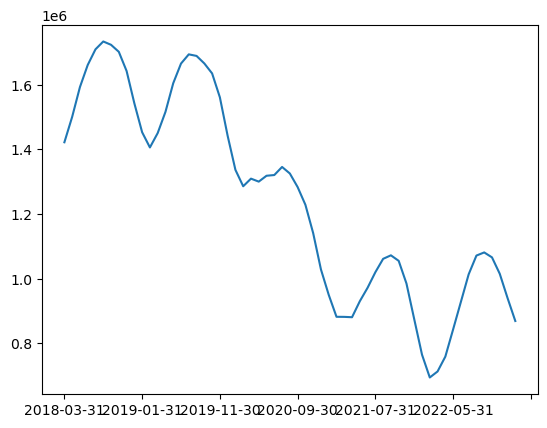

In [157]:
# ploting row one as its represent usa
inventory.iloc[0, 2: ].plot()

In [90]:
# droping row 1
inventory.drop(0,inplace=True)
inventory.head()

RegionName StateName  2018-03-31  2018-04-30  2018-05-31  2018-06-30  \
1     New York, NY        NY     73707.0     80345.0     85864.0     90067.0   
2  Los Angeles, CA        CA     21998.0     23784.0     25605.0     27109.0   
3      Chicago, IL        IL     38581.0     42253.0     45757.0     47492.0   
4       Dallas, TX        TX     24043.0     25876.0     28225.0     30490.0   
5      Houston, TX        TX     25618.0     27360.0     29634.0     31129.0   

   2018-07-31  2018-08-31  2018-09-30  2018-10-31  ...  2022-04-30  \
1     91881.0     91252.0     90050.0     89340.0  ...     47109.0   
2     28811.0     29874.0     30428.0     30606.0  ...     15425.0   
3     48984.0     49782.0     49630.0     48916.0  ...     23993.0   
4     32408.0     33567.0     33512.0     32589.0  ...     14963.0   
5     32397.0     32911.0     32423.0     31475.0  ...     17175.0   

   2022-05-31  2022-06-30  2022-07-31  2022-08-31  2022-09-30  2022-10-31  \
1     51197.0     54292.0     56794.0     57028.0     56203.0     54573.0   
2     16951.0     18425.0     20182.0     21357.0     21499.0     20945.0   
3     26443.0     28448.0     30255.0     31135.0     30782.0     29809.0   
4     16053.0     17750.0     20382.0     22258.0     22760.0     22348.0   
5     18420.0     19852.0     21624.0     23069.0     23666.0     23545.0   

   2022-11-30  2022-12-31  2023-01-31  
1     52210.0     47597.0     43381.0  
2     19713.0     17911.0     16121.0  
3     27762.0     24736.0     21865.0  
4     21408.0     19895.0     18445.0  
5     22815.0     21748.0     20762.0  

[5 rows x 61 columns]

In [98]:
# checking for null values row wise


inventory.isnull().sum()



RegionName     0
StateName      0
2018-03-31    29
2018-04-30    29
2018-05-31    29
              ..
2022-09-30     5
2022-10-31     3
2022-11-30     3
2022-12-31     3
2023-01-31     0
Length: 61, dtype: int64

In [99]:
# groupby state 
state_inventory= inventory.groupby('StateName').mean()

In [100]:
state_inventory.head()

2018-03-31   2018-04-30   2018-05-31   2018-06-30   2018-07-31  \
StateName                                                                    
AK          595.750000   637.750000   701.750000   761.000000   823.500000   
AL         1279.050000  1327.600000  1372.550000  1396.700000  1397.400000   
AR          696.600000   726.100000   761.650000   789.400000   805.350000   
AZ         3738.636364  3819.727273  3842.636364  3774.090909  3657.181818   
CA         2445.882353  2652.500000  2875.205882  3047.176471  3218.323529   

            2018-08-31   2018-09-30   2018-10-31   2018-11-30   2018-12-31  \
StateName                                                                    
AK          864.750000   851.750000   810.750000   731.750000   644.750000   
AL         1391.200000  1358.050000  1325.200000  1271.750000  1201.750000   
AR          814.250000   811.150000   798.550000   778.400000   746.250000   
AZ         3554.818182  3475.363636  3494.090909  3545.727273  3466.272727   
CA         3325.529412  3386.970588  3406.352941  3323.117647  3098.735294   

           ...   2022-04-30   2022-05-31   2022-06-30   2022-07-31  \
StateName  ...                                                       
AK         ...   297.250000   349.500000   411.250000   462.250000   
AL         ...   508.080000   540.720000   580.680000   622.000000   
AR         ...   394.142857   422.571429   451.285714   483.952381   
AZ         ...  2012.727273  2204.363636  2460.454545  2772.727273   
CA         ...  1780.147059  1997.794118  2194.794118  2416.147059   

            2022-08-31   2022-09-30   2022-10-31   2022-11-30   2022-12-31  \
StateName                                                                    
AK          493.750000   474.000000   426.250000   364.250000   305.000000   
AL          653.040000   657.000000   650.960000   630.760000   603.840000   
AR          509.428571   515.333333   513.571429   499.285714   477.571429   
AZ         3040.636364  3187.909091  3228.181818  3139.000000  2948.181818   
CA         2557.852941  2573.705882  2500.676471  2336.676471  2107.205882   

            2023-01-31  
StateName               
AK          257.250000  
AL          582.360000  
AR          455.952381  
AZ         2762.181818  
CA         1869.470588  

[5 rows x 59 columns]

In [103]:
state_inventory.shape

(50, 59)

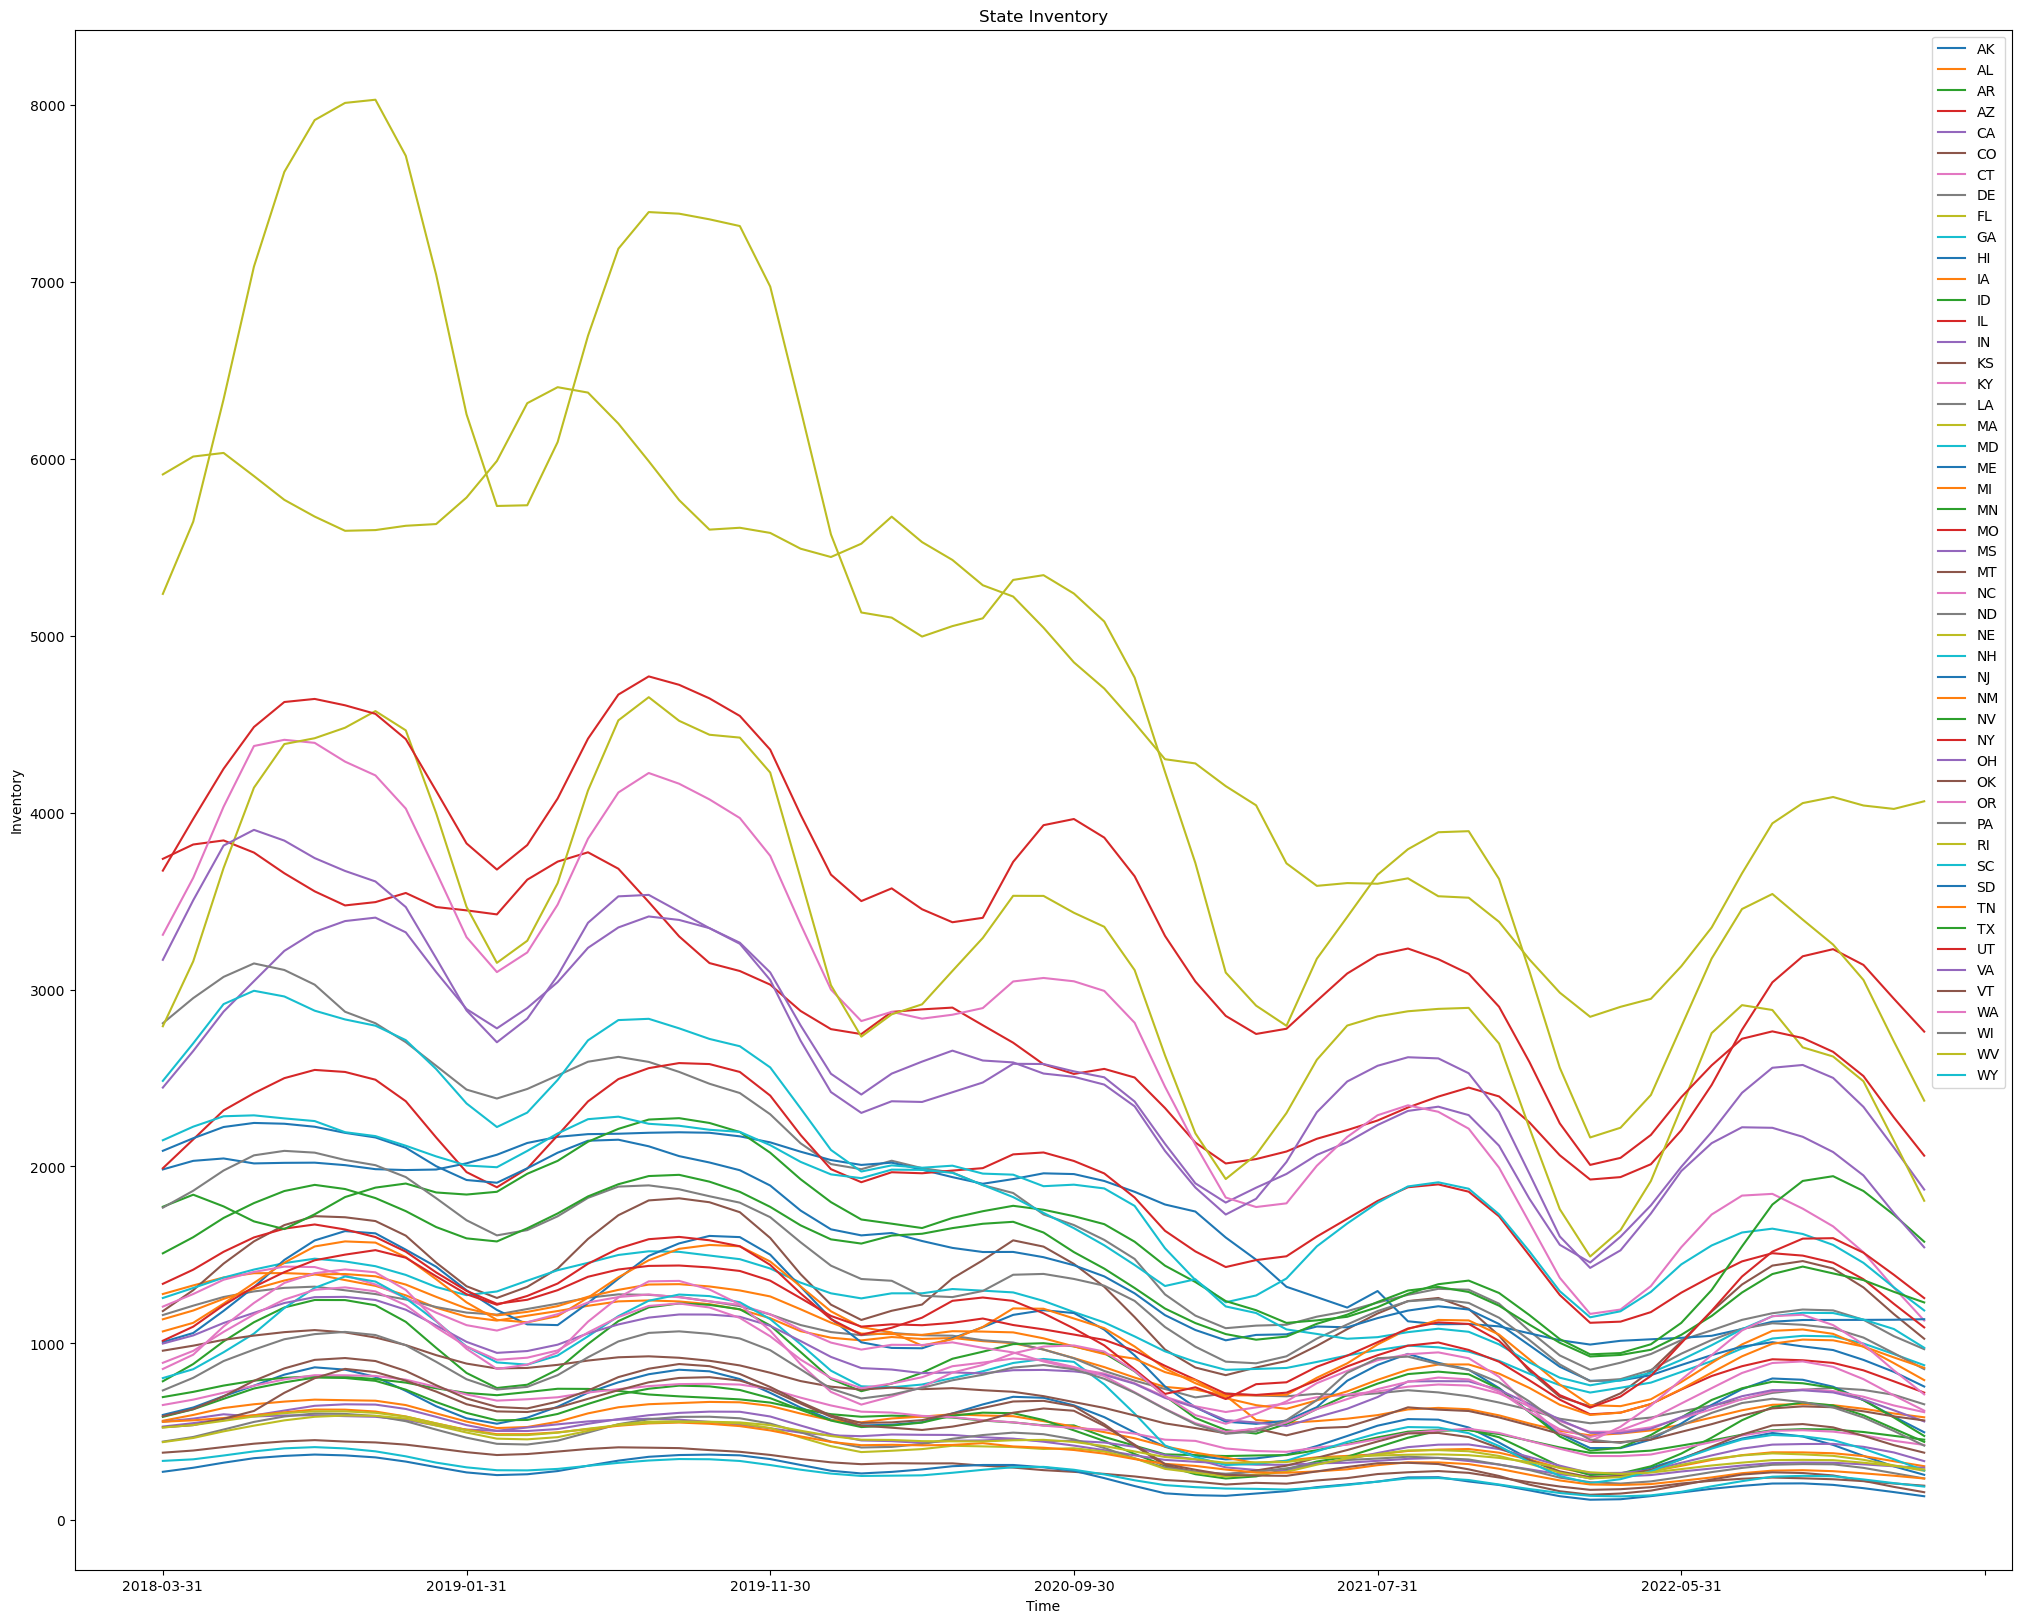

In [107]:
# plot data rowsize wise for each state
for i in range(0,state_inventory.shape[0]):
            
            state_inventory.iloc[i].plot(label=state_inventory.index[i], legend=True, figsize=(25,20))
            plt.title('State Inventory')
            plt.ylabel('Inventory')
            plt.xlabel('Time')  

In [106]:
# dont show all output of one cell
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "last_expr"

In [108]:
#analysis of rental data
rental= pd.read_csv("Metro_zori_sm_month.csv")
rental.head()

RegionID  SizeRank       RegionName RegionType StateName   2015-03-31  \
0    102001         0    United States    country       NaN  1304.765607   
1    394913         1     New York, NY        msa        NY  2385.219396   
2    753899         2  Los Angeles, CA        msa        CA  1914.730864   
3    394463         3      Chicago, IL        msa        IL  1422.672410   
4    394514         4       Dallas, TX        msa        TX  1157.334850   

    2015-04-30   2015-05-31   2015-06-30   2015-07-31  ...   2022-04-30  \
0  1314.826253  1324.585785  1334.686343  1340.823032  ...  1900.134122   
1  2403.753582  2421.231076  2439.382330  2448.425349  ...  2955.859223   
2  1927.655457  1940.995475  1952.425792  1968.438708  ...  2823.035882   
3  1435.441402  1446.702786  1470.374315  1476.787061  ...  1795.344311   
4  1167.824303  1179.831226  1187.613051  1193.868953  ...  1740.651141   

    2022-05-31   2022-06-30   2022-07-31   2022-08-31   2022-09-30  \
0  1922.956545  1947.715930  1968.283854  1981.452792  1986.672234   
1  3015.296055  3076.799046  3130.332141  3154.033247  3151.025599   
2  2857.376769  2882.139364  2903.194297  2916.149142  2923.484011   
3  1820.754624  1841.547087  1860.531252  1868.719705  1871.457472   
4  1769.936539  1803.818103  1827.997976  1837.990096  1837.313291   

    2022-10-31   2022-11-30   2022-12-31   2023-01-31  
0  1984.735689  1976.529824  1971.469353  1970.243426  
1  3127.883766  3095.742311  3072.639223  3065.017318  
2  2919.007841  2910.841929  2902.889391  2896.943067  
3  1869.964119  1863.995689  1864.939703  1868.858460  
4  1825.096163  1810.306142  1795.009792  1789.450877  

[5 rows x 100 columns]

In [109]:
# shape= rental.shape
rental.shape

(538, 100)

In [110]:
# droping columns 
rental.drop(['RegionID','SizeRank','RegionType'],axis=1,inplace=True)

<AxesSubplot: >

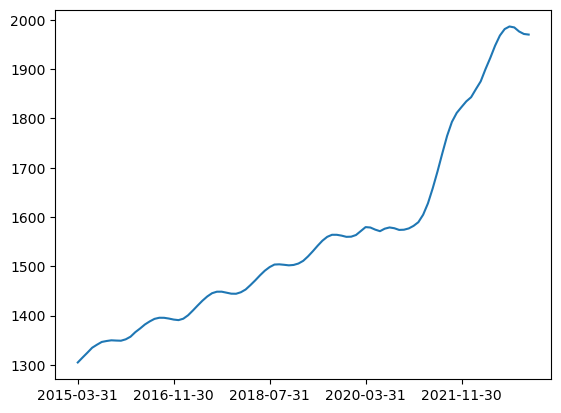

In [112]:
# ploting first row represent rent for whole us
rental.iloc[0, 2:].plot()

In [113]:
# droping row 1
rental.drop(0,inplace=True)

In [114]:
# checking for null values
rental.isnull().sum()

RegionName      0
StateName       0
2015-03-31    303
2015-04-30    300
2015-05-31    300
             ... 
2022-09-30    114
2022-10-31    103
2022-11-30     85
2022-12-31     64
2023-01-31      0
Length: 97, dtype: int64

In [117]:
# grouping by state
state_rental= rental.groupby('StateName').mean()
state_rental.head()

2015-03-31   2015-04-30   2015-05-31   2015-06-30   2015-07-31  \
StateName                                                                    
AK         1267.157818  1261.610863  1268.931475  1277.283320  1278.772928   
AL          872.117038   868.766022   875.207182   882.438048   897.332692   
AR          832.901115   849.250556   872.790457   876.366815   878.793698   
AZ          893.186337   901.605463   906.096210   910.108116   911.756630   
CA         1527.244979  1543.930294  1559.483440  1569.420387  1582.395624   

            2015-08-31   2015-09-30   2015-10-31   2015-11-30   2015-12-31  \
StateName                                                                    
AK         1276.515944  1271.176850  1273.861203  1268.938166  1268.956510   
AL          899.188325   896.921467   896.999542   892.232708   893.692950   
AR          879.300623   877.007017   875.910575   874.767275   874.067785   
AZ          912.757326   915.176071   915.433797   918.035268   919.951212   
CA         1592.366025  1601.168549  1608.573985  1608.651006  1612.412045   

           ...   2022-04-30   2022-05-31   2022-06-30   2022-07-31  \
StateName  ...                                                       
AK         ...  1548.594555  1580.694546  1611.933401  1620.581404   
AL         ...  1246.177185  1262.525105  1276.219395  1292.804677   
AR         ...  1126.162872  1138.133322  1153.815584  1172.127327   
AZ         ...  1670.335725  1683.304005  1669.558149  1681.363152   
CA         ...  2290.554751  2275.697363  2305.456405  2317.290218   

            2022-08-31   2022-09-30   2022-10-31   2022-11-30   2022-12-31  \
StateName                                                                    
AK         1617.955194  1627.086871  1603.930885  1604.046206  1602.281346   
AL         1305.712095  1314.245374  1298.747843  1261.508500  1276.150162   
AR         1180.067231  1179.440061  1171.129678  1176.591583  1118.535793   
AZ         1683.264957  1698.534191  1682.599242  1678.231426  1673.546755   
CA         2320.532488  2318.389018  2311.885129  2308.903007  2248.367520   

            2023-01-31  
StateName               
AK         1621.963758  
AL         1254.668913  
AR         1123.655841  
AZ         1695.622718  
CA         2239.781798  

[5 rows x 95 columns]

In [119]:
state_rental.shape

(50, 95)

In [122]:
# checking for null values
(state_rental.isnull().sum(axis=1)).unique()

array([ 0, 10,  1, 17,  8], dtype=int64)

In [124]:
# droping null rows
state_rental.dropna(inplace=True)


In [125]:
state_rental.shape

(46, 95)

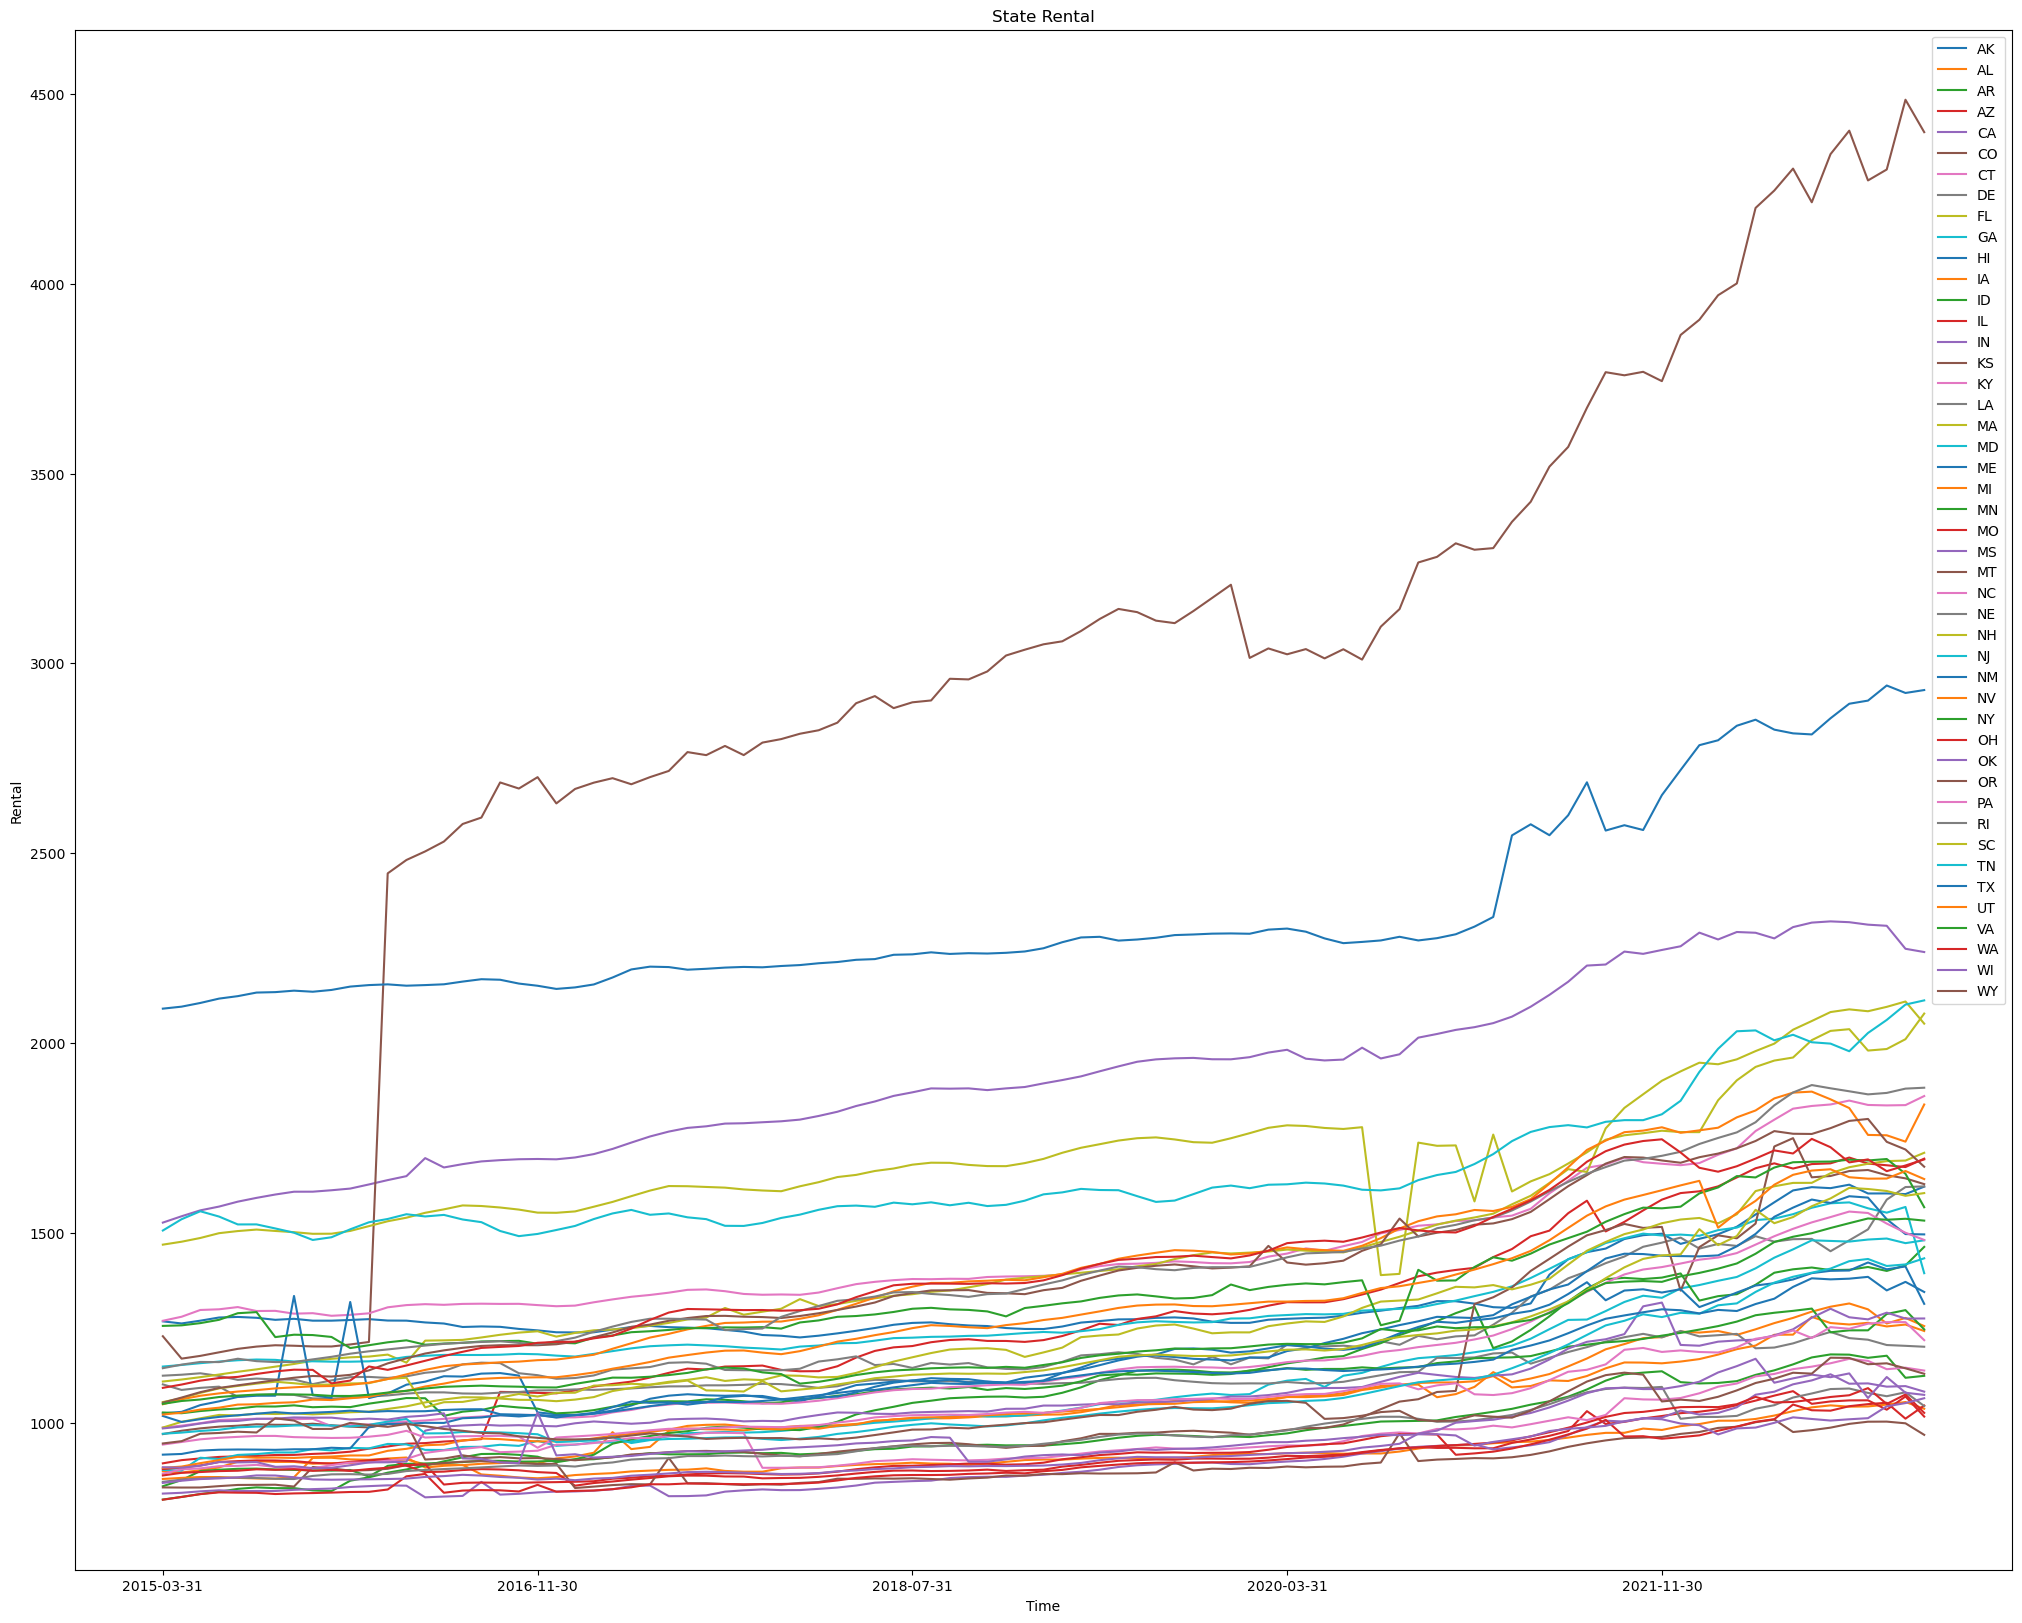

In [126]:
# ploting data rowsize wise for each state
for i in range(0,state_rental.shape[0]):       
            state_rental.iloc[i].plot(label=state_rental.index[i], legend=True, figsize=(25,20))
            plt.title('State Rental')
            plt.ylabel('Rental')
            plt.xlabel('Time')

In [128]:
# Ananlysing sales to list ratio
sales_list_r= pd.read_csv("Metro_mean_sale_to_list_uc_sfrcondo_sm_month.csv")
sales_list_r.head()


RegionID  SizeRank       RegionName RegionType StateName  2018-03-31  \
0    102001         0    United States    country       NaN    0.979482   
1    394913         1     New York, NY        msa        NY    0.975933   
2    753899         2  Los Angeles, CA        msa        CA    0.998907   
3    394463         3      Chicago, IL        msa        IL    0.969395   
4    394514         4       Dallas, TX        msa        TX    0.986143   

   2018-04-30  2018-05-31  2018-06-30  2018-07-31  ...  2022-03-31  \
0    0.982724    0.985563    0.987432    0.987451  ...    1.009523   
1    0.977992    0.980509    0.982068    0.983364  ...    1.005768   
2    1.001730    1.003293    1.003413    1.002265  ...    1.046879   
3    0.972522    0.976098    0.978318    0.979145  ...    0.991697   
4    0.989417    0.991880    0.992975    0.992107  ...    1.032570   

   2022-04-30  2022-05-31  2022-06-30  2022-07-31  2022-08-31  2022-09-30  \
0    1.018369    1.025435    1.026512    1.020841    1.010891    1.000590   
1    1.011040    1.019398    1.028660    1.033086    1.031404    1.023677   
2    1.058144    1.060843    1.054098    1.038661    1.021235    1.007337   
3    0.998917    1.007305    1.012834    1.012544    1.007312    0.999456   
4    1.046675    1.056153    1.053053    1.039466    1.019869    1.002477   

   2022-10-31  2022-11-30  2022-12-31  
0    0.992873    0.987731    0.983649  
1    1.014298    1.006678    1.001095  
2    0.999684    0.994848    0.991066  
3    0.992004    0.986732    0.983204  
4    0.990887    0.984983    0.980370  

[5 rows x 63 columns]

In [129]:
# shape
sales_list_r.shape

(447, 63)

In [131]:
# drop columns
sales_list_r.drop(['RegionID','SizeRank','RegionType'],axis=1,inplace=True)


<AxesSubplot: >

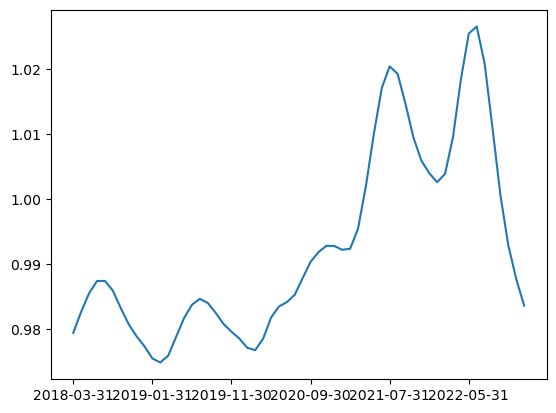

In [132]:
# ploting first row represent sales to list ratio for whole us
sales_list_r.iloc[0, 2:].plot()

In [134]:
# droping row 1
sales_list_r.drop(0,inplace=True)

In [136]:
# checking for null values
sales_list_r.isnull().sum()

RegionName      0
StateName       0
2018-03-31    154
2018-04-30    150
2018-05-31    148
2018-06-30    148
2018-07-31    144
2018-08-31    142
2018-09-30    142
2018-10-31    142
2018-11-30    139
2018-12-31    137
2019-01-31    136
2019-02-28    125
2019-03-31    119
2019-04-30    111
2019-05-31    110
2019-06-30    110
2019-07-31    110
2019-08-31    110
2019-09-30    108
2019-10-31    108
2019-11-30    108
2019-12-31    108
2020-01-31    107
2020-02-29     99
2020-03-31     89
2020-04-30     87
2020-05-31     79
2020-06-30     65
2020-07-31     63
2020-08-31     61
2020-09-30     55
2020-10-31     54
2020-11-30     53
2020-12-31     48
2021-01-31     35
2021-02-28     31
2021-03-31     20
2021-04-30     23
2021-05-31     25
2021-06-30     33
2021-07-31     26
2021-08-31     14
2021-09-30     11
2021-10-31     12
2021-11-30     11
2021-12-31     11
2022-01-31     11
2022-02-28     11
2022-03-31     10
2022-04-30     10
2022-05-31      9
2022-06-30      8
2022-07-31      8
2022-08-31

In [137]:
# groupby sttate
state_sales_list_r= sales_list_r.groupby('StateName').mean()
state_sales_list_r.head()

2018-03-31  2018-04-30  2018-05-31  2018-06-30  2018-07-31  \
StateName                                                               
AL           0.970610    0.972300    0.976679    0.977173    0.976825   
AR           0.969274    0.971988    0.975695    0.976751    0.974912   
AZ           0.975213    0.976838    0.977438    0.976410    0.976100   
CA           0.995739    0.998513    0.999757    0.999243    0.997563   
CO           0.987506    0.991475    0.995499    0.997736    0.994371   

           2018-08-31  2018-09-30  2018-10-31  2018-11-30  2018-12-31  ...  \
StateName                                                              ...   
AL           0.974205    0.972157    0.973207    0.972718    0.971300  ...   
AR           0.973432    0.971489    0.970852    0.969322    0.967902  ...   
AZ           0.975707    0.975607    0.975536    0.974766    0.973711  ...   
CA           0.995521    0.992728    0.989757    0.987213    0.985400  ...   
CO           0.992106    0.988437    0.984980    0.982274    0.981617  ...   

           2022-03-31  2022-04-30  2022-05-31  2022-06-30  2022-07-31  \
StateName                                                               
AL           0.997439    1.001035    1.004236    1.005382    1.002259   
AR           0.990123    0.994590    0.999514    0.999244    0.996021   
AZ           0.999528    1.004774    1.007454    1.002204    0.994673   
CA           1.026058    1.033854    1.036643    1.030124    1.017985   
CO           1.008402    1.018051    1.022172    1.020110    1.010115   

           2022-08-31  2022-09-30  2022-10-31  2022-11-30  2022-12-31  
StateName                                                              
AL           0.999155    0.992878    0.988188    0.980769    0.974901  
AR           0.989011    0.985616    0.979914    0.975493    0.969942  
AZ           0.984793    0.977813    0.974329    0.971558    0.969460  
CA           1.005016    0.996976    0.991482    0.988370    0.983451  
CO           0.997869    0.988276    0.981907    0.978313    0.973569  

[5 rows x 58 columns]

In [138]:
# checking for null values
(state_sales_list_r.isnull().sum(axis=1)).unique()

array([ 0, 36, 13], dtype=int64)

In [139]:
# droping null rows
state_sales_list_r.dropna(inplace=True)

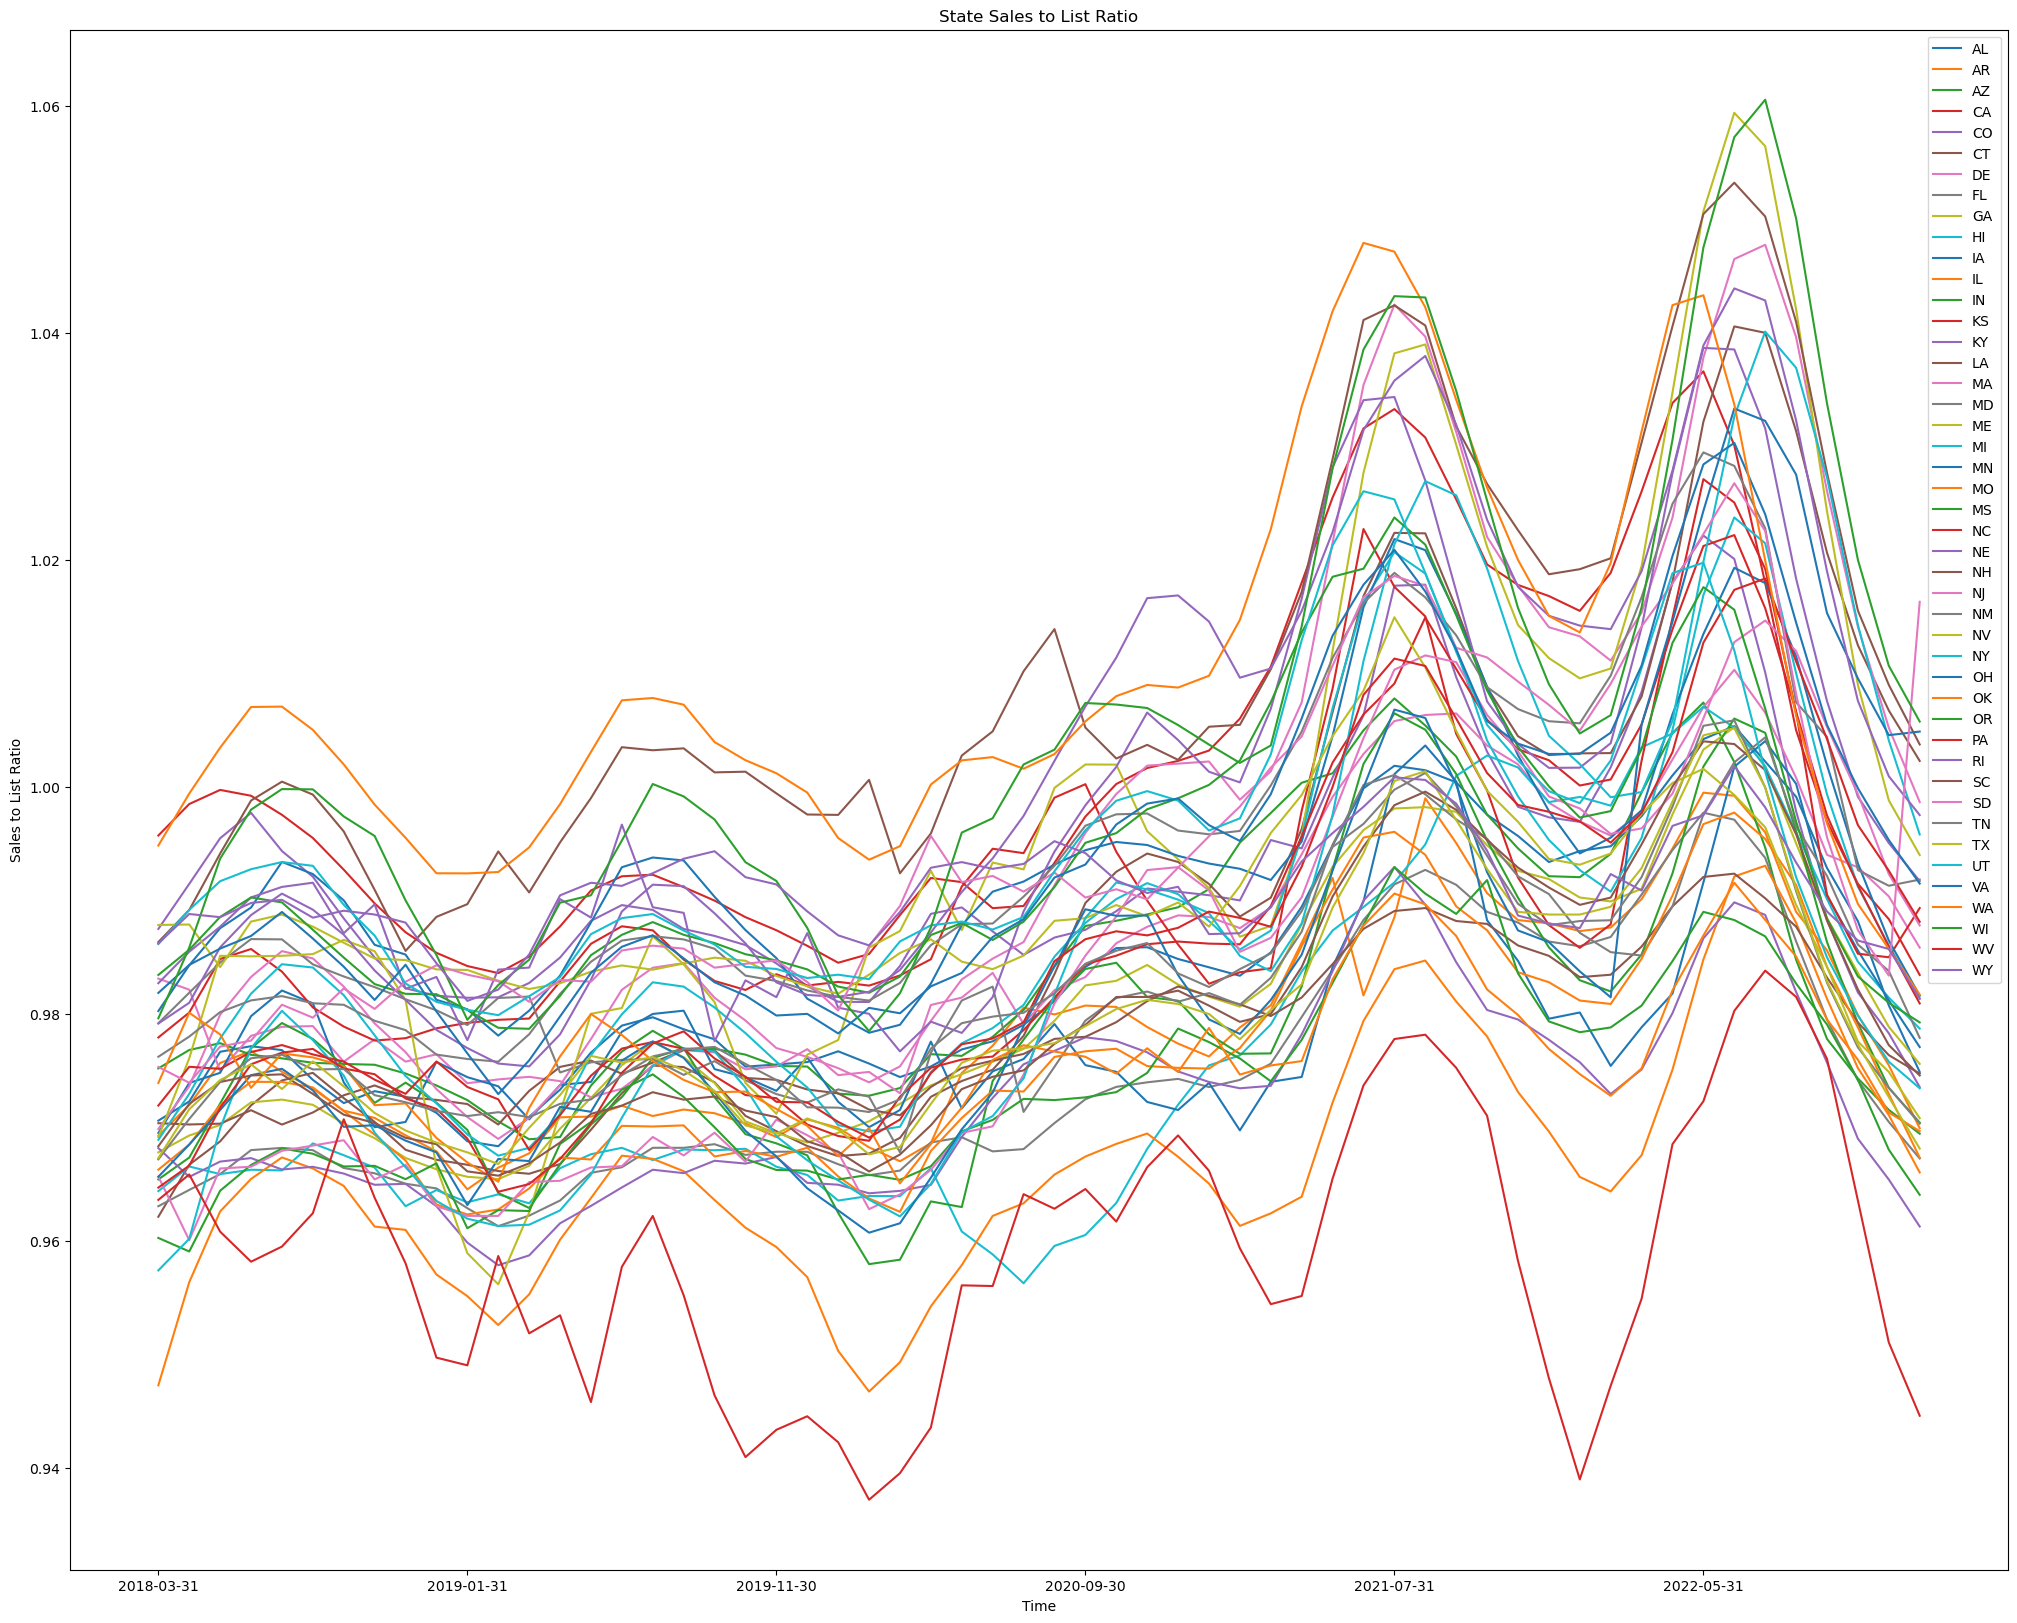

In [142]:
# ploting value row wise for each state
for i in range(0,state_sales_list_r.shape[0]):
                
                state_sales_list_r.iloc[i].plot(label=state_sales_list_r.index[i], legend=True, figsize=(25,20))
                plt.title('State Sales to List Ratio')
                plt.ylabel('Sales to List Ratio')
                plt.xlabel('Time')

In [159]:
# Analyszing price cut 
price_cut= pd.read_csv("Metro_mean_listings_price_cut_amt_uc_sfrcondo_sm_month.csv")
price_cut.head()

RegionID  SizeRank       RegionName RegionType StateName    2018-03-31  \
0    102001         0    United States    country       NaN  14668.075925   
1    394913         1     New York, NY        msa        NY  39436.870647   
2    753899         2  Los Angeles, CA        msa        CA  44820.203428   
3    394463         3      Chicago, IL        msa        IL  12415.627447   
4    394514         4       Dallas, TX        msa        TX  12578.204060   

     2018-04-30    2018-05-31    2018-06-30    2018-07-31  ...    2022-04-30  \
0  14945.842056  15125.711133  15007.951314  14542.453113  ...  26516.950632   
1  39820.673103  39650.570024  37115.646877  34155.709321  ...  74256.214981   
2  43563.045102  43375.405752  42113.069724  39234.310630  ...  75947.849121   
3  13023.392016  13267.985560  13241.713719  12701.101798  ...  16424.676384   
4  12725.988140  12892.375575  12323.929393  11560.459259  ...  21475.709276   

     2022-05-31    2022-06-30    2022-07-31    2022-08-31    2022-09-30  \
0  26943.781402  26292.199435  25201.140910  23227.720062  21517.120962   
1  62951.738335  50562.044530  47760.721632  42524.755236  41503.069036   
2  70937.403184  66373.148234  59666.373856  54237.097489  50787.329929   
3  17781.473902  17683.582559  17008.717478  15453.215378  14480.788880   
4  21917.257086  22765.571761  21488.828250  19443.921104  17309.581584   

     2022-10-31    2022-11-30    2022-12-31    2023-01-31  
0  20807.551735  20261.264724  19377.784599  19157.233822  
1  42741.311550  44592.224827  42121.426455  42607.931535  
2  50610.406148  50700.986786  48907.316411  50661.262574  
3  13891.271125  13432.899362  12527.918786  12380.184335  
4  16380.247577  15711.271515  15004.925216  14588.292861  

[5 rows x 64 columns]

In [160]:
# shape
price_cut.shape

(649, 64)

In [161]:
# drop columns
price_cut.drop(['RegionID','SizeRank','RegionType'],axis=1,inplace=True)

<AxesSubplot: >

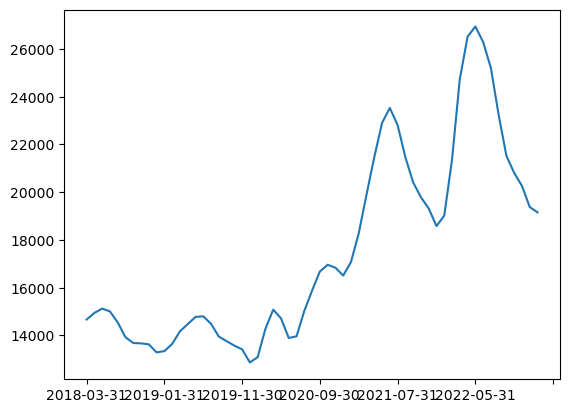

In [162]:
# ploting row 1 represent price cut for whole us
price_cut.iloc[0, 2:].plot()

In [163]:
# drop row 1
price_cut.drop(0,inplace=True)

In [165]:
# null values
price_cut.isnull().sum(axis=1).unique()

array([ 1,  0,  4,  3,  2,  5, 37, 48, 50, 36, 40, 46, 38, 58, 26, 52, 35,
       51, 49, 47,  6, 43, 10, 39, 34, 57, 45], dtype=int64)

In [166]:
# // drop rows with null values grater than 30
price_cut.dropna(thresh=30,inplace=True)

In [167]:
# groupby state
state_price_cut= price_cut.groupby('StateName').mean()
state_price_cut.head()

2018-03-31    2018-04-30    2018-05-31    2018-06-30  \
StateName                                                           
AK          7483.169849   7266.927598   7522.626825   7684.446407   
AL          9342.506361   9354.741605   9311.686497   9148.656564   
AR         10397.729040  10116.794746  10239.805500  10037.952399   
AZ         10882.122013  11213.928447  11036.185094  10649.003539   
CA         28124.696711  27738.344429  27827.699551  27684.615164   

             2018-07-31    2018-08-31    2018-09-30    2018-10-31  \
StateName                                                           
AK          7900.986112   7878.336441   8007.468413   8124.338515   
AL          9008.549956   9021.083105   8893.796076   8886.781798   
AR          9886.451766   9676.742237   9445.018374   9088.142969   
AZ         10099.816977   9699.131952   9686.656080   9917.175175   
CA         26207.073625  24819.973564  23449.590617  22744.509224   

             2018-11-30    2018-12-31  ...    2022-04-30    2022-05-31  \
StateName                              ...                               
AK          8208.750359   8223.280806  ...  18445.802007  18177.989500   
AL          8898.099076   8807.027624  ...  15486.032863  16293.716087   
AR          8717.657504   8756.601690  ...  19481.011213  18590.932225   
AZ         10466.069490  10151.607717  ...  19514.190899  19906.611582   
CA         22214.897865  21762.195227  ...  45101.096740  44751.608445   

             2022-06-30    2022-07-31    2022-08-31    2022-09-30  \
StateName                                                           
AK         16234.691553  16255.780702  16262.936197  15864.690794   
AL         16337.241404  15739.529022  15281.492181  14928.154938   
AR         18430.166311  17808.656309  16632.747121  15663.923514   
AZ         19739.951773  19065.088670  18025.307872  16832.571297   
CA         42704.642030  40056.697435  36590.356316  34284.014410   

             2022-10-31    2022-11-30    2022-12-31    2023-01-31  
StateName                                                          
AK         16040.281212  15590.640652  15504.678981  15077.107110  
AL         14355.517928  13304.560134  12803.753333  12939.265631  
AR         15308.972675  14789.144305  14532.996571  14503.280295  
AZ         16570.807102  16182.673889  16298.872450  15942.200976  
CA         33634.246929  33736.415388  32894.584443  33964.468266  

[5 rows x 59 columns]

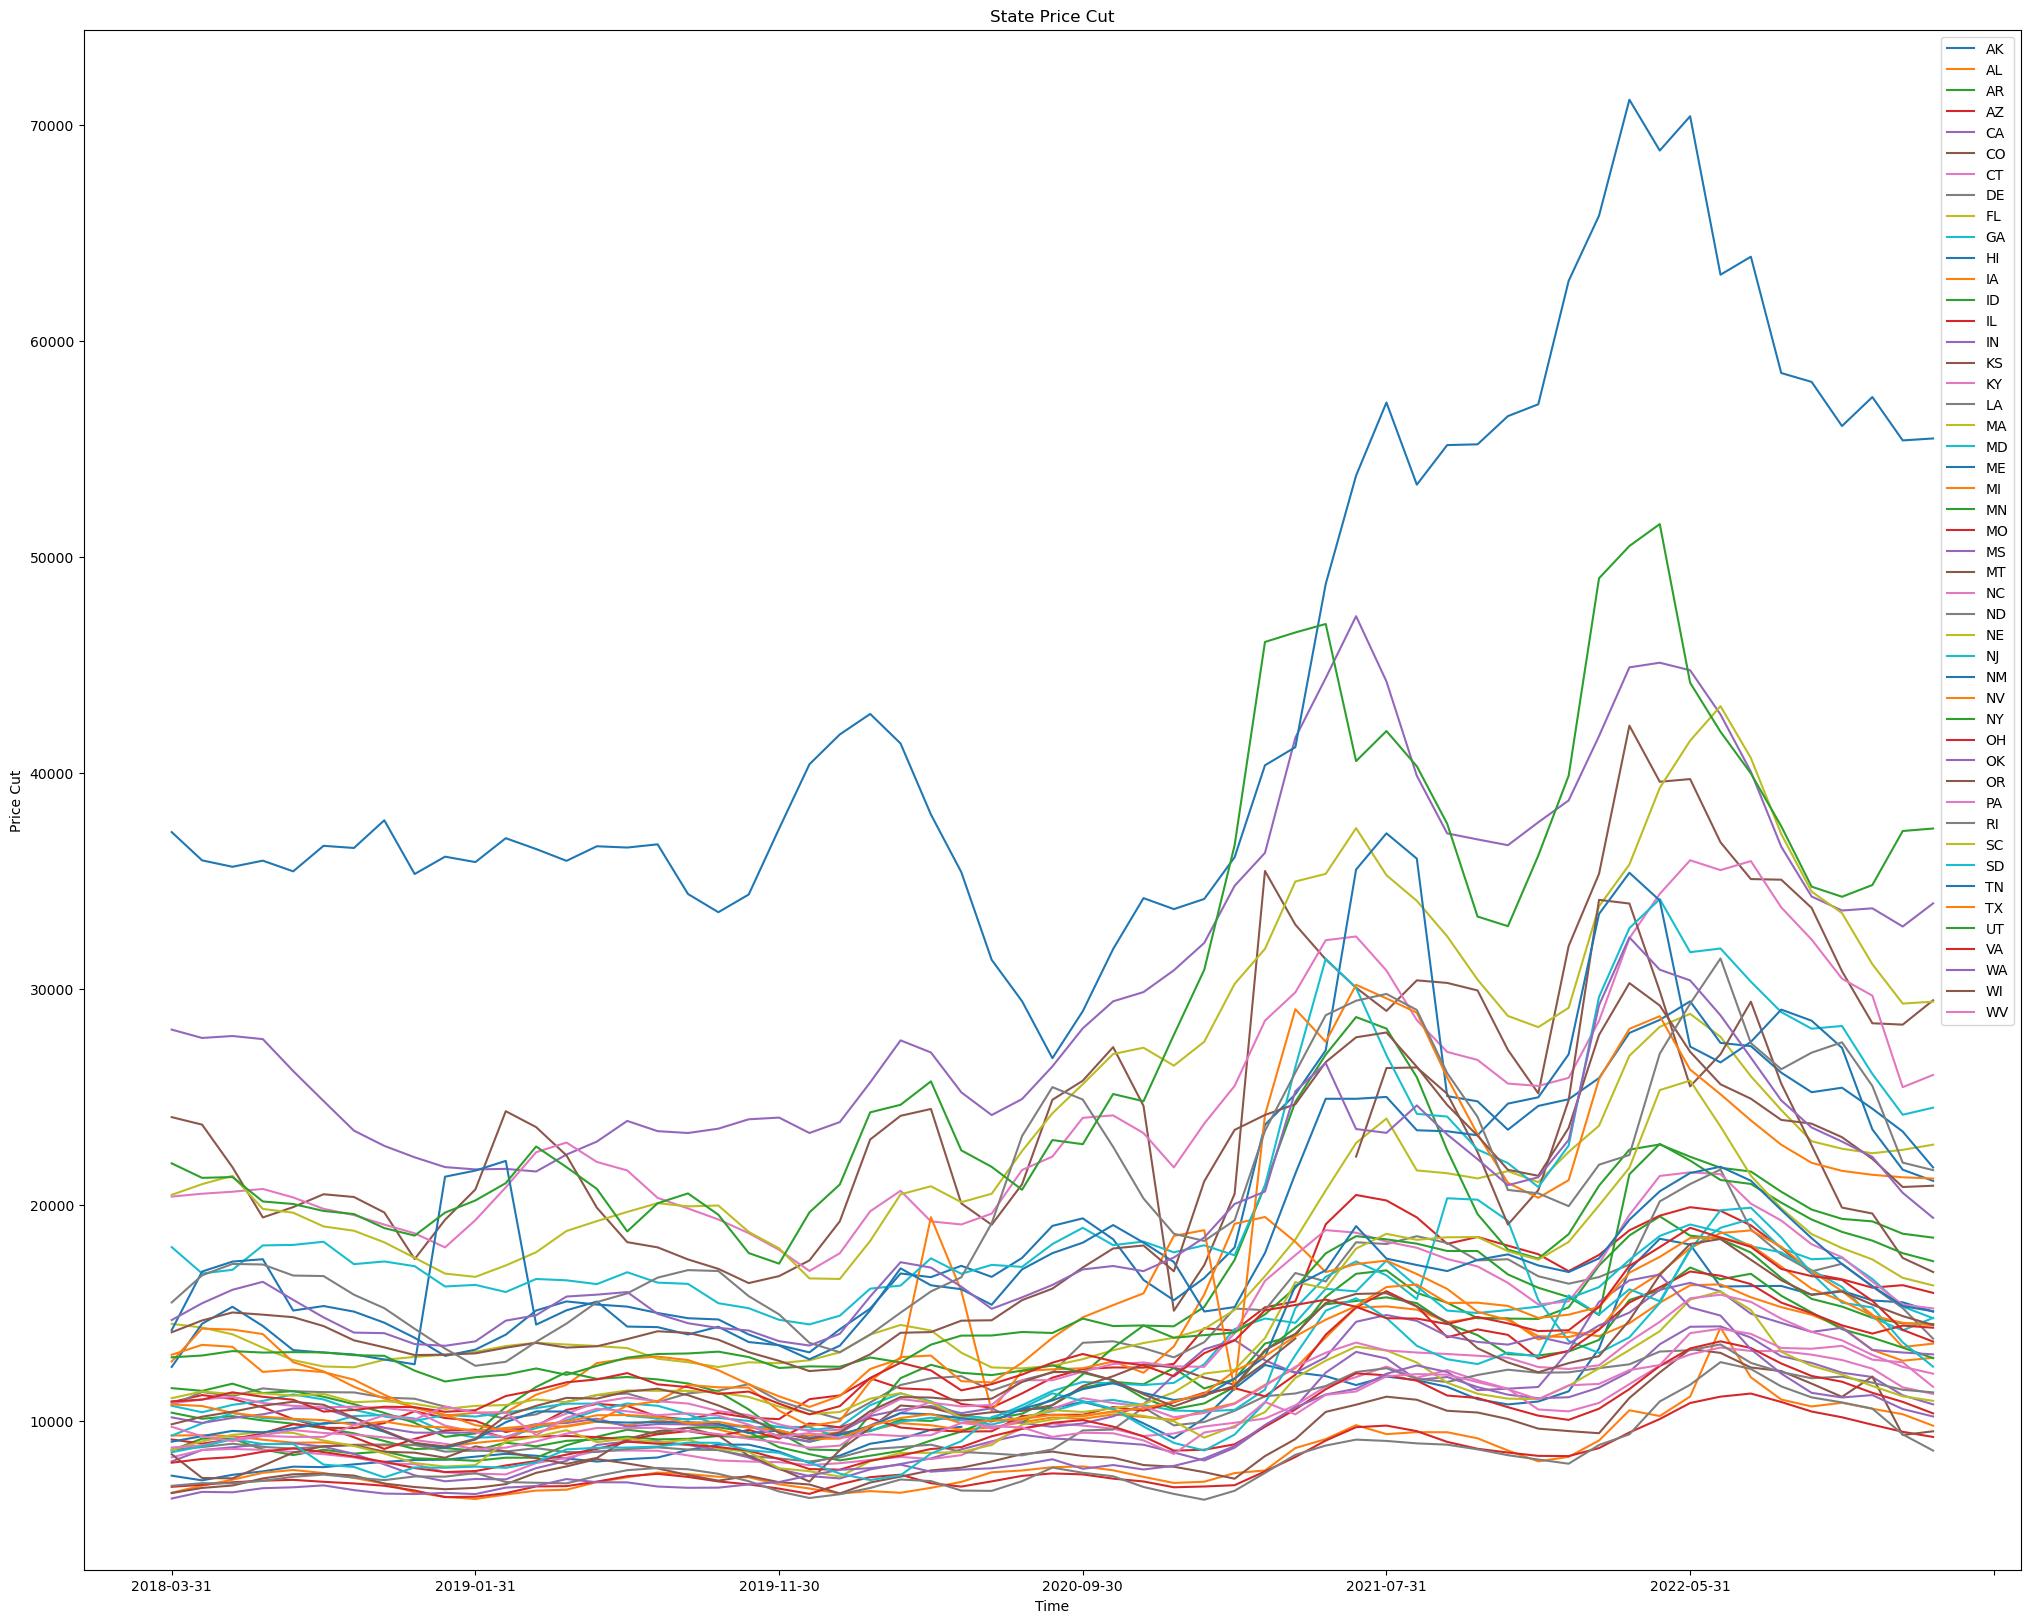

In [168]:
# ploting data row wise for each state
for i in range(0,state_price_cut.shape[0]): 
            state_price_cut.iloc[i].plot(label=state_price_cut.index[i], legend=True, figsize=(25,20))
            plt.title('State Price Cut')
            plt.ylabel('Price Cut')
            plt.xlabel('Time')
            

In [174]:
# finging corelation between sales_list_r and price_cut row wise for each state present in both data and store in dictnoary
corr_dict= {}
for i in range(0,state_sales_list_r.shape[0]):  
    if state_sales_list_r.index[i] in state_price_cut.index:
        corr_dict[state_sales_list_r.index[i]]= state_sales_list_r.iloc[i].corr(state_price_cut.loc[state_sales_list_r.index[i]])

# for i in range(0,state_sales_list_r.shape[0]):
#     if state_sales_list_r.index[i] in state_price_cut.index:
#         print(state_sales_list_r.index[i])
#         print(state_sales_list_r.iloc[i].corr(state_price_cut.loc[state_sales_list_r.index[i]]))


In [310]:
state_price_cut.loc[state_sales_list_r.index[0]].iloc[-3:]

2022-11-30    13304.560134
2022-12-31    12803.753333
2023-01-31    12939.265631
Name: AL, dtype: float64

Text(0.5, 0, 'State')

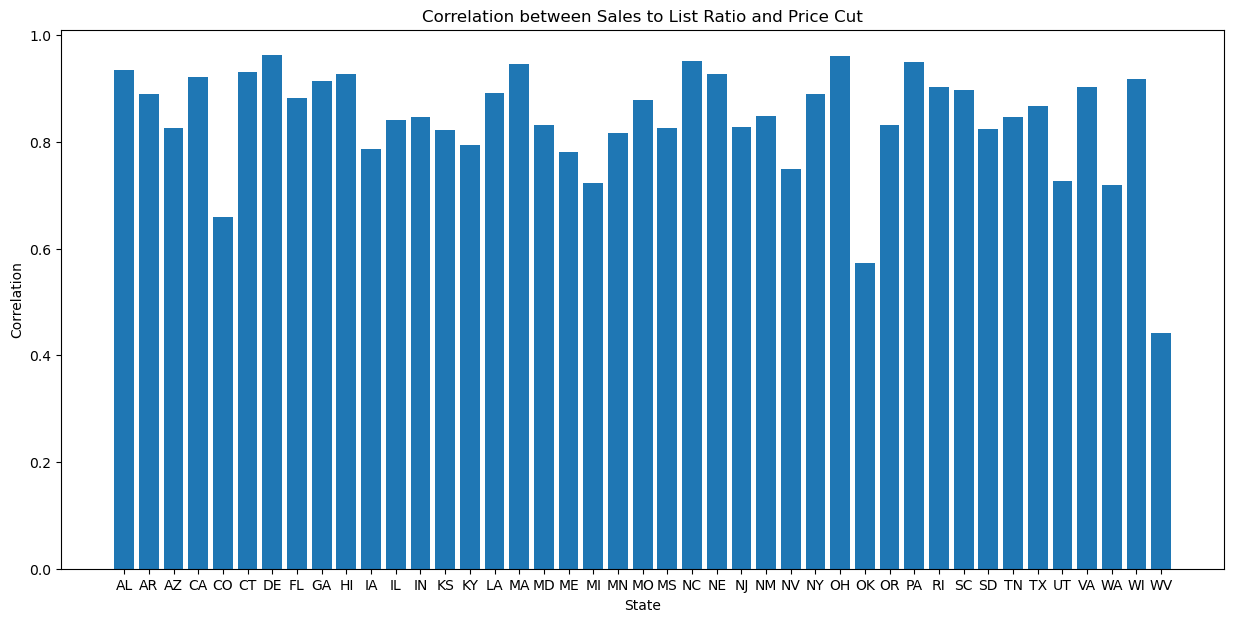

In [178]:
# ploting correlation dictnory 
plt.figure(figsize=(15,7))
plt.bar(corr_dict.keys(),corr_dict.values())
plt.title('Correlation between Sales to List Ratio and Price Cut')
plt.ylabel('Correlation')
plt.xlabel('State')


In [199]:
state_sales_list_r.columns

Index(['2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
       '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
       '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30', '2019-05-31',
       '2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
       '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
       '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
       '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31',
       '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
       '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31', '2021-11-30',
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
       '2022-10-31', '2022-11-30', '2022-12-31'],
      dtype='object')

In [312]:
# state_zhvi.loc[state_sales_list_r.index[0]]
state_zhvi.loc[state_sales_list_r.index[3]]

2000-01-31    181445.288085
2000-02-29    182056.654538
2000-03-31    182880.980363
2000-04-30    184669.632027
2000-05-31    186747.053661
                  ...      
2022-09-30    739548.911109
2022-10-31    733118.959725
2022-11-30    728127.391155
2022-12-31    723104.776230
2023-01-31    716909.241412
Name: CA, Length: 277, dtype: float64

In [313]:
# finding corelation between sales_list_r and state_zhvi row wise for each state present in both data and store in dictnoary based on lat 58 rows ofstate_zhvi
corr_dict2= {}
for i in range(0,state_sales_list_r.shape[0]):
    if state_sales_list_r.index[i] in state_zhvi.index:
        corr_dict2[state_sales_list_r.index[i]]= state_sales_list_r.iloc[i].corr(state_zhvi.loc[state_sales_list_r.index[i]].iloc[-58:])

In [314]:
corr_dict2

{'AR': 0.7788048168773836,
 'CA': 0.6713861093089892,
 'CO': 0.5617255363132718,
 'CT': 0.9303082821820322,
 'DE': 0.8669145437738736,
 'FL': 0.7516134557102283,
 'GA': 0.8055565677633211,
 'HI': 0.8513556657386655,
 'IA': 0.6180678944586488,
 'IL': 0.7325749691301503,
 'IN': 0.6731132010623476,
 'KY': 0.652343140390461,
 'LA': 0.8426370174122634,
 'MA': 0.890946361151779,
 'MD': 0.6861550541265424,
 'ME': 0.8343663615686007,
 'MI': 0.7803911959783207,
 'MN': 0.6768505845281136,
 'MO': 0.7596523248590034,
 'MS': 0.7160460504464915,
 'NC': 0.8197963383335667,
 'NE': 0.7401023554501713,
 'NH': 0.8296775743475261,
 'NJ': 0.9070849301166883,
 'NV': 0.36526090530706884,
 'NY': 0.8768085506950761,
 'OH': 0.8802741948204703,
 'OK': 0.4963778178199555,
 'OR': 0.6202062908765843,
 'PA': 0.8988258556107639,
 'RI': 0.8368820816769181,
 'SC': 0.7879717265740976,
 'TN': 0.6806716884377543,
 'TX': 0.69854144442287,
 'UT': 0.5033592657363221,
 'VA': 0.8366060636418876,
 'WA': 0.5107774237954809,
 'WI

Text(0.5, 0, 'State')

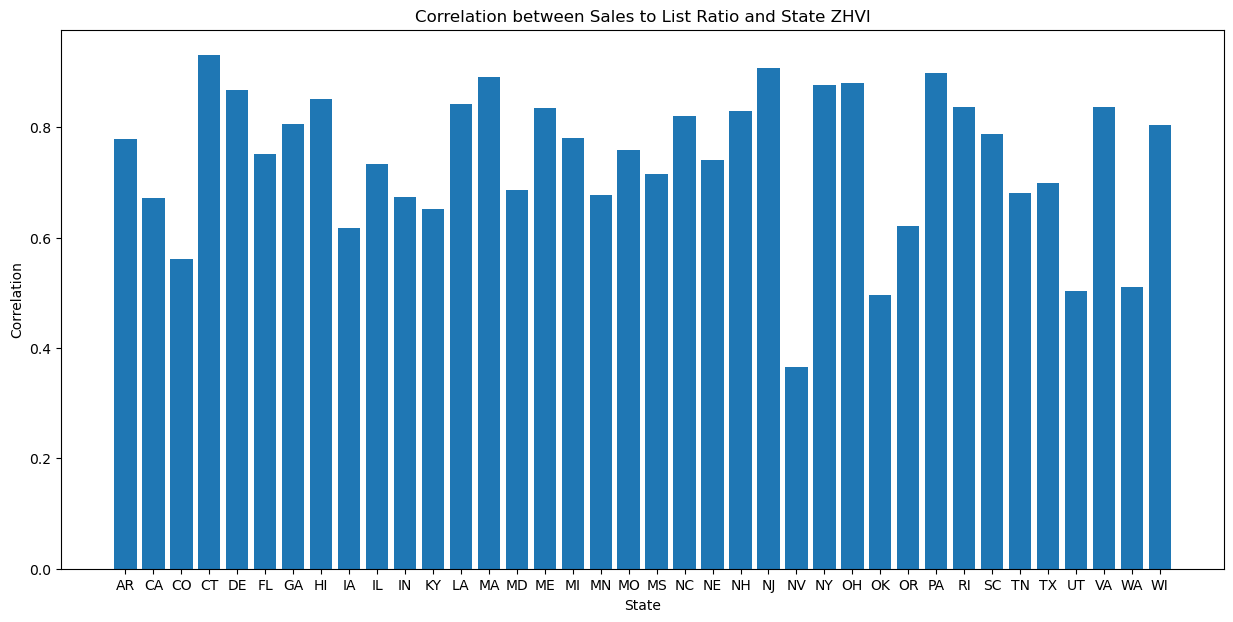

In [316]:
# plot correlation dictnory 2
plt.figure(figsize=(15,7))
plt.bar(corr_dict2.keys(),corr_dict2.values())
plt.title('Correlation between Sales to List Ratio and State ZHVI')
plt.ylabel('Correlation')
plt.xlabel('State')
